**Universidad Aut√≥noma Metropolitana - Unidad Iztapalapa (UAM-I)**

**Maestr√≠a en Matem√°ticas Aplicadas e Industriales (MCMAI)**

**Taller de Modelado Matem√°tico II - Parte I**

> Trimestre 25-P

**Profesor**: 
    
> Dr. Alejandro Rom√°n V√°squez

**Alumnos**: 
    
> Alan Badillo Salas
> 
> Brandon Eduardo Antonio G√≥mez
> 
> Diego Armando Arce Montes de Oca

# Introducci√≥n

En esta **Tarea 1** analizaremos el conjunto de datos sobre el precio de casas en Iowa y Ames.

Los objetivos particulares ser√°n: 

* Importaci√≥n de los datos
* Exploraci√≥n inicial
* Ingenier√≠a de variables
* Tratamiento de datos faltantes
* An√°lisis de la distribuci√≥n de la respuesta
* Relaci√≥n de la respuesta con las preditoras

Para conseguirlo, comenzaremos a describir cada paso, empezando por la importaci√≥n y exploraci√≥n de los ejes de datos, para seguir con la construcci√≥n de variables, el tratamiento a datos faltantes y finalmente los posteriores an√°lisis basados en las predictoras y la respuesta.

## Importaci√≥n de las librer√≠as

Para la primera parte debemos importar las librer√≠as que utilizaremos durante todo el an√°lisis y adquirir los datos usando la librer√≠a de *Pandas*.

La documentaci√≥n de las librer√≠as la podemos consultar en:

> Numpy - http://numpy.org/
>
> Pandas - http://pandas.pydata.org/
>
> Matplotlib - http://matplotlib.org/
>
> Seaborn - http://seaborn.pydata.org

Usaremos la forma completa posible para cada librer√≠a, evitando abreviaciones innecesarias para que quede m√°s claro qu√© funci√≥n se utiliza de cada librer√≠a.

In [21]:
import numpy
import pandas
import matplotlib.pyplot as pyplot
import seaborn

# Fase 1 - Adquisici√≥n

En la primera fase haremos la adquisici√≥n del conjunto de datos desde el archivo `Casas.csv`, para posteriormente delimitar las columnas de an√°lisis que ser√°n trabajadas.

## Adquisici√≥n del conjunto de datos

Mediante *pandas* cargaremos el *DataFrame* (objeto de tabla) con los datos contenidos en el archivo `Casas.csv`, y extraeremos su informaci√≥n principal, observando que:

- Hay $1,460$ registros (muestras)
- Hay $81$ columnas totales, de las cuales $3$ son decimales, $35$ son num√©ricas y $43$ son posibles categor√≠as (objetos o textos). 
- La memoria utilizada es de casi $1mb$.

In [22]:
casas = pandas.read_csv("Casas.csv")
casas_kaggle = pandas.read_csv("Casas_Kaggle.csv")

In [23]:
casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [24]:
casas_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

## Selecci√≥n de las columnas de an√°lisis

De los $81$ ejes de datos, nos limitaremos en este an√°lisis a los ejes de datos:

* MSZoning
* LotArea
* Street
* Neighborhood
* YearBuilt
* OverallCond
* ExterQual
* GrLivArea
* FullBath
* GarageArea
* BsmtCond
* FireplaceQu
* Electrical
* LotFrontage
* KitchenQual
* PavedDrive
* SalePrice

Por lo que filtraremos dichas columnas y mostraremos la informaci√≥n principal, teniendo que:

- Se preservan los $1,460$ registros
- Hay $17$ columnas totales, de las cuales $1$ es decimal, $7$ son num√©ricas y $9$ son posibles categor√≠as (objetos o textos). 
- La memoria utilizada es de casi $200kb$.

In [25]:
columnas_analisis = [
    "MSZoning",
    "LotArea",
    "Street",
    "Neighborhood",
    "YearBuilt",
    "OverallCond",
    "ExterQual",
    "GrLivArea",
    "FullBath",
    "GarageArea",
    "BsmtCond",
    "FireplaceQu",
    "Electrical",
    "LotFrontage",
    "KitchenQual",
    "PavedDrive",
    "SalePrice",
]

casas_analisis = casas[columnas_analisis]

casas_analisis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSZoning      1460 non-null   object 
 1   LotArea       1460 non-null   int64  
 2   Street        1460 non-null   object 
 3   Neighborhood  1460 non-null   object 
 4   YearBuilt     1460 non-null   int64  
 5   OverallCond   1460 non-null   int64  
 6   ExterQual     1460 non-null   object 
 7   GrLivArea     1460 non-null   int64  
 8   FullBath      1460 non-null   int64  
 9   GarageArea    1460 non-null   int64  
 10  BsmtCond      1423 non-null   object 
 11  FireplaceQu   770 non-null    object 
 12  Electrical    1459 non-null   object 
 13  LotFrontage   1201 non-null   float64
 14  KitchenQual   1460 non-null   object 
 15  PavedDrive    1460 non-null   object 
 16  SalePrice     1460 non-null   int64  
dtypes: float64(1), int64(7), object(9)
memory usage: 194.0+ KB


Nos percatemos que en las columnas `BsmtCond`, `FireplaceQu`, `Electrical` y `LotFrontage` hay valores nulos o faltantes, por lo que estas columnas requerir√°n imputaci√≥n.

# Fase 2 - Exploraci√≥n

En la segunda fase haremos una exploraci√≥n de las 16 columnas de an√°lisis y su comportamiento respecto a la columna de respuesta `SalePrice`.

Lo primero que haremos ser√° un an√°lisis individual de cada columna para conformar un eje de datos que pueda ser analizado, entendiendo que:

* Una columna contiene los datos
* De una columna se pueden extraer uno o varios ejes de datos, de acuerdo al tipo de datos que codifique y su tratamiento, por ejemplo, si la columna es categ√≥rica, se pueden formar varios ejes binarios usando *on-hot encoder* o *dummies encoder* o un solo eje num√©rico usando *mean encoder*
* El eje de datos puede ser explorado, pero no necesariamente es una variable de an√°lisis, ya que puede contener malformados, valores nulos o at√≠picos. Esto requerir√° procesos de limpieza, imputaci√≥n y *winsorizado*.
* Cuando un eje de datos est√° corregido, puede ser tratado como una variable de an√°lisis, que se espera que sea num√©rica continua o binaria.

## Columna 1 - MSZoning

> Tipo de columna: Cualitativo Nominal (multiclase)

Este eje de datos se refiere a una clasificaci√≥n de la zona, con los valores:

* **RL** (Residential Low Density) ‚Äî Se refiere a una casa en una zona residencial de baja densidad (zona urbana).
* **RM** (Residential Medium Density) ‚Äî Se refiere a una casa en una zona residencial de mediana densidad (puede incluir peque√±os edificios multifamiliares).
* **C (all)** (Commercial) ‚Äî Usos comerciales (negocios, oficinas, etc.).
* **FV** (Floating Village Residential) ‚Äî Residencial tipo ‚Äúaldea flotante‚Äù, m√°s exclusivo o con restricciones particulares.
* **RH** (Residential High Density) ‚Äî Residencial de alta densidad, como departamentos o unidades multifamiliares.

Este eje de datos se puede dividir en variables de tipo *One-Hot*, *Dummies* o *Mean*


Inspeccionamos los primeros valores:

In [26]:
casas_analisis["MSZoning"].head()

0    RL
1    RL
2    RL
3    RL
4    RL
Name: MSZoning, dtype: object

Observamos que es una variable categ√≥rica, por lo que contamos el n√∫mero de elementos en cada categor√≠a:

In [27]:
casas_analisis["MSZoning"].value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

Vemos que los datos se cargan a las categor√≠as `RL` y `RM`, por lo que veremos las proporciones:

In [28]:
casas_analisis["MSZoning"].value_counts(normalize=True)

MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: proportion, dtype: float64

Notamos que las primeras dos categor√≠as `RL` y `RM` suman casi el $94\%$ de los datos.

Visualizaremos estas cargas con barras:

<Axes: xlabel='MSZoning'>

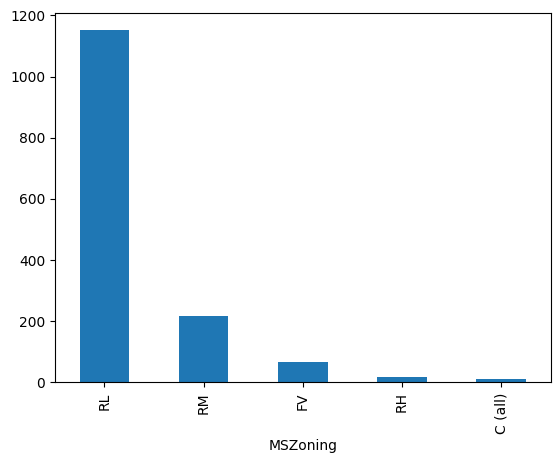

In [29]:
casas_analisis["MSZoning"].value_counts().plot.bar()

Nos percatamos que `RL - Residential Low Density` aparece m√°s y `C (all) - Commercial` menos.

Analizamos el comportamiento de los precios de venta respecto a cada zona:

SalePrice    Axes(0.125,0.11;0.775x0.77)
dtype: object

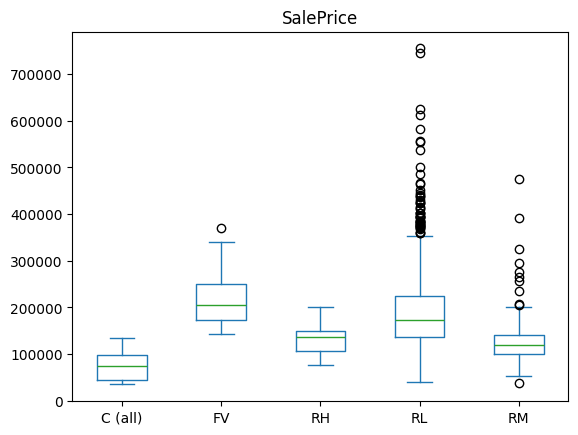

In [30]:
casas_analisis[["MSZoning", "SalePrice"]].plot.box("MSZoning")

Algunas categor√≠as tienen bastantes puntos at√≠picos, los cuales deber√≠an ser tratatos con un *winsorizado* para evitar degeneraciones.

### Conclusiones de la exploraci√≥n de MSZoning

Observamos que el precio de venta de las casas si es distinto en cada zona, por ejemplo, en zonas comerciales los precios son al rededor de los $\$100,000$, mientras que en aldeas flotantes se elvan al rededor de los $\$200,000$ y $\$300,000$. Aunque no hay suficientes muestras que respalden estos precios, apenas $10$ y $65$ registros respectivamente.

Tambi√©n notamos que hay gran cantidad de puntos at√≠picos en la zona de residencial baja y media, lo cual tambi√©n se relaciona al hecho de que tienen m√°s registros ($1,151$ y $218$ respectivamente).

Esta columna corre el riesgo de una varianza casi cero ya que casi el $80\%$ de los datos son solo de la categor√≠a `RL`.

Lo correcto para esta columna ser√≠a dividir $4$ ejes de datos de tipo *Dummies* para las categor√≠as `C (all)`, `FV`, `RH` y `RM`, dejando la categor√≠a `RM` como base.

Adem√°s a las categor√≠as `FV`, `RM` y `RL` se les deber√≠a hacer un tratamiento de puntos at√≠picos.

Otra estrategia que podr√≠a funcionar es usar la codificaci√≥n *Mean* para manejar un √∫nico eje de datos que combine el promedio de cada precio venta para cada categor√≠a (tratando los puntos at√≠picos previamente con winsorizado).

## Columna 2 - LotArea

> Tipo de columna: Cuantitativo Continuo (valores enteros)

Este eje representa el √°rea total del lote o terreno en pies cuadrados, podemos observar un m√≠nimo de $1,300$ pies cuadrados que podr√≠a representar un m√≠nimo reglamentario. Una mediana de $9,478$ pies cuadrados y una media de $10,516$, con un m√°ximo de $215,245$ que se aleja bastante del resto.

Aqu√≠ conviene usar el *RIC/IQR* (Rango Inter-Cuart√≠lico) para identificar los puntos at√≠picos y posiblemente limitarlos.

Inspeccionamos los primeros valores:

In [31]:
casas_analisis["LotArea"].head()

0     8450
1     9600
2    11250
3     9550
4    14260
Name: LotArea, dtype: int64

Aunque se ven enteros, estos se refieren a √°reas, por lo que se pueden tratar de forma continua, por lo que visualizaremos su distribuci√≥n en general mediante la caja:

<Axes: >

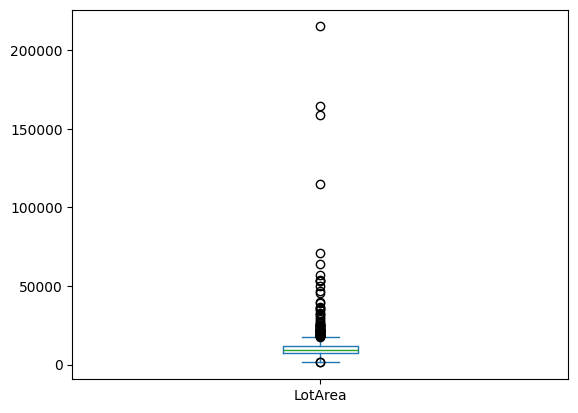

In [32]:
casas_analisis["LotArea"].plot.box()

Observamos gran cantidad de puntos at√≠picos que har√≠an que la densidad se cargue a valores peque√±os y deje a los valores m√°s altos muy lejanos, esto lo podemos comprobar con la gr√°fica de densidad:

<Axes: ylabel='Density'>

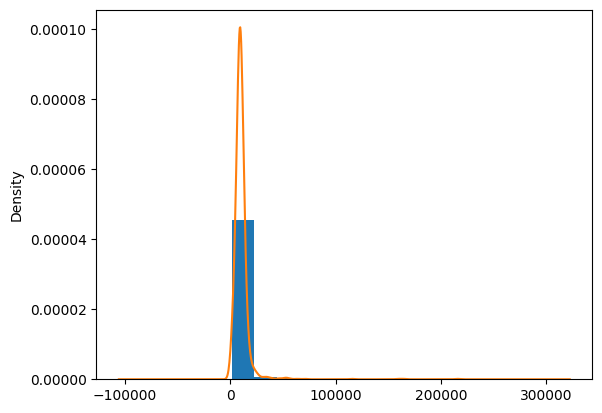

In [33]:
casas_analisis["LotArea"].plot.hist(density=True)
casas_analisis["LotArea"].plot.density()

Aqu√≠ debemos aplicar un winsorizado para evitar los puntos at√≠picos y colapsarlos al m√°ximo y m√≠nimo respecto al *IQR* (Rango Inter-Cuart√≠lico).

Crearemos una nueva columna con la correcci√≥n:

1. Obtener el rango inter-cuart√≠lico de `LotArea`
2. Obtener el l√≠mite m√°ximo y m√≠nimo relativos a $1.5 \cdot IQR$
3. Guardar los datos corregidos en otra columna
4. Guardar la informaci√≥n sobre si es un punto at√≠pico superior o inferior

In [34]:
# Calculamos los cuartiles y el IQR
Q1 = casas_analisis["LotArea"].quantile(0.25)
Q3 = casas_analisis["LotArea"].quantile(0.75)
IQR = Q3 - Q1
# Calculamos los l√≠mites superior e inferior
sup = Q3 + 1.5 * IQR
inf = Q1 - 1.5 * IQR

print(inf, sup)

# Copiamos los datos de LotArea en la columna corregida
casas_analisis.loc[:, ["LotArea - Corregido"]] = casas_analisis["LotArea"].astype(float).copy()
# # Actualizamos los datos que superan al l√≠mite superior e inferior
casas_analisis.loc[casas_analisis["LotArea"] > sup, ["LotArea - Corregido"]] = sup
casas_analisis.loc[casas_analisis["LotArea"] < inf, ["LotArea - Corregido"]] = inf

# # Guardamos la informaci√≥n sobre si el punto es at√≠pico superior o inferior
casas_analisis.loc[:, ["LotArea - At√≠pico Superior"]] = casas_analisis["LotArea"] > casas_analisis["LotArea - Corregido"]
casas_analisis.loc[:, ["LotArea - At√≠pico Inferior"]] = casas_analisis["LotArea"] < casas_analisis["LotArea - Corregido"]

# # Mostramos 10 muestras sobre las columnas corregidas
casas_analisis[["LotArea", "LotArea - Corregido", "LotArea - At√≠pico Superior", "LotArea - At√≠pico Inferior"]].sample(10)

1481.5 17673.5


LotArea  LotArea - Corregido  LotArea - At√≠pico Superior  \
1103     8910               8910.0                       False   
338     14145              14145.0                       False   
645     10530              10530.0                       False   
1277    17871              17673.5                        True   
876     25286              17673.5                        True   
1257     4060               4060.0                       False   
1279     7500               7500.0                       False   
1019     3013               3013.0                       False   
379      8123               8123.0                       False   
148      7500               7500.0                       False   

      LotArea - At√≠pico Inferior  
1103                       False  
338                        False  
645                        False  
1277                       False  
876                        False  
1257                       False  
1279                       False  
1019                       False  
379                        False  
148                        False

Ahora podemos explorar mejor `LotArea` sin los puntos at√≠picos:

<Axes: >

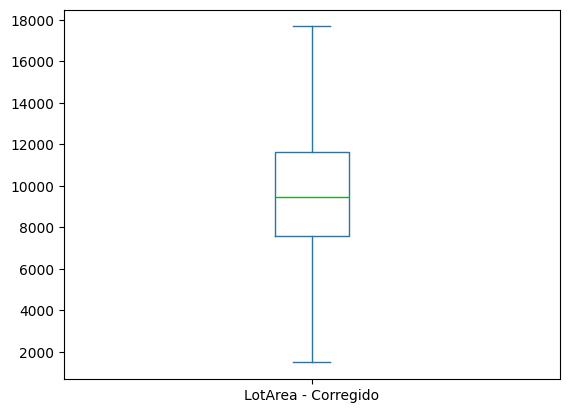

In [35]:
casas_analisis["LotArea - Corregido"].plot.box()

<Axes: ylabel='Density'>

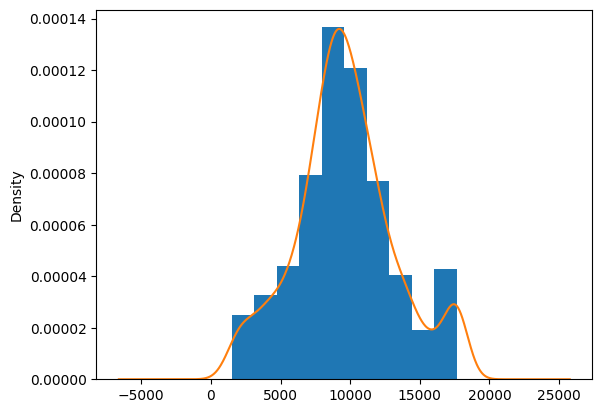

In [36]:
casas_analisis["LotArea - Corregido"].plot.hist(density=True)
casas_analisis["LotArea - Corregido"].plot.density()

Ahora podemos comparar el precio de venta contra el √°rea de lote:

<Axes: xlabel='LotArea - Corregido', ylabel='SalePrice'>

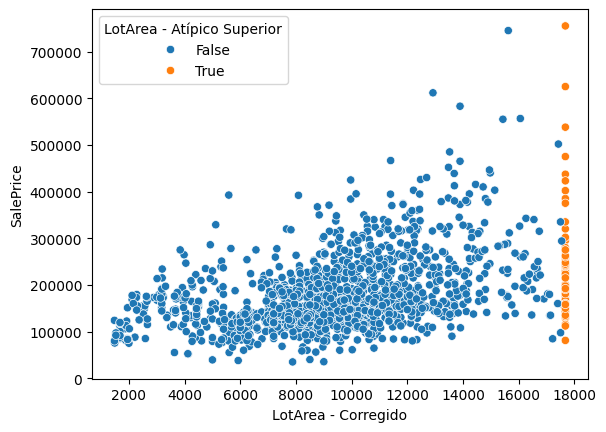

In [37]:
seaborn.scatterplot(casas_analisis, x="LotArea - Corregido", y="SalePrice", hue="LotArea - At√≠pico Superior")

Podemos ver que no se ve una fuerte asociaci√≥n entre el precio de venta y el tama√±o de lote, aunque si se observa que los valores m√°ximos llegan m√°s arriba cuando el tama√±o de lote crece.

Podr√≠amos comparar los cuartiles de √°rea contra los cuartiles de precio de venta, para ver si hay una asociaci√≥n visual m√°s fuerte:

In [38]:
# Agregamos las categor√≠as sobre el tama√±o de lote y tipo de precio
casas_analisis.loc[:, ["LotArea - Tama√±o"]] = pandas.qcut(casas_analisis["LotArea - Corregido"], q=[0.0, 0.333, 0.666, 1.0], labels=["Chico", "Mediano", "Grande"])
casas_analisis.loc[:, ["SalePrice - Tipo"]] = pandas.qcut(casas_analisis["SalePrice"], q=[0.0, 0.333, 0.666, 1.0], labels=["Barato", "Normal", "Caro"])

casas_analisis[["LotArea - Corregido", "LotArea - Tama√±o", "SalePrice", "SalePrice - Tipo"]].sample(10)

LotArea - Corregido LotArea - Tama√±o  SalePrice SalePrice - Tipo
611               10395.0          Mediano     148000           Normal
158               12552.0           Grande     254900             Caro
440               15431.0           Grande     555000             Caro
526               13300.0           Grande     132000           Barato
585               11443.0           Grande     369900             Caro
1238              13072.0           Grande     142500           Normal
439               12354.0           Grande     110000           Barato
387                7200.0            Chico     125000           Barato
434                1890.0            Chico      81000           Barato
852                7128.0            Chico     164000           Normal

Ahora podemos ver el total de registros de cada categor√≠a para ver si hay una asociaci√≥n visual entre que el lote sea chico, mediano o grande y que el precio sea barato, normal o caro:

In [39]:
casas_analisis[["LotArea - Tama√±o", "SalePrice - Tipo", "SalePrice"]].groupby(
    ["LotArea - Tama√±o", "SalePrice - Tipo"], observed=True).count().unstack()

SalePrice            
SalePrice - Tipo    Barato Normal Caro
LotArea - Tama√±o                      
Chico                  257    159   70
Mediano                163    176  148
Grande                  66    156  265

Ahora los visualizamos:

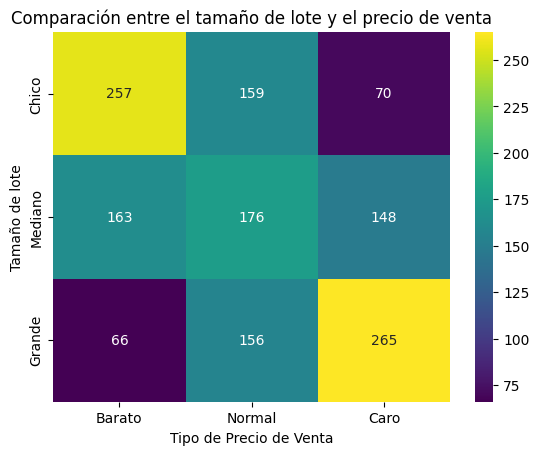

In [40]:
reporte = casas_analisis[["LotArea - Tama√±o", "SalePrice - Tipo", "SalePrice"]].groupby(
    ["LotArea - Tama√±o", "SalePrice - Tipo"], observed=True).count().unstack()

reporte.columns = reporte.columns.droplevel(0)

seaborn.heatmap(reporte,annot=True, fmt=".0f", cmap="viridis")
pyplot.xlabel("Tipo de Precio de Venta")
pyplot.ylabel("Tama√±o de lote")
pyplot.title("Comparaci√≥n entre el tama√±o de lote y el precio de venta")
pyplot.show()

Podemos ver que la mayor√≠a de lotes chicos tienden a tener precios de venta baratos, mientras que la mayor√≠a de lotes grandes tienden a tener precios de venta caros.

Por lo que si hay una asociaci√≥n entre el tama√±o de lote y el precio de venta.

Tambi√©n podemos ver los datos normalizados para entender la proporciones:

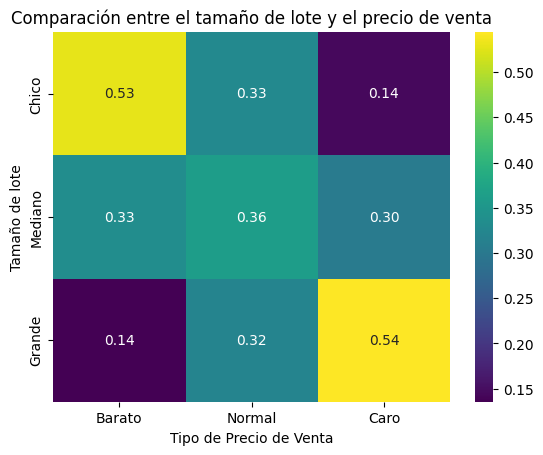

In [41]:
reporte = casas_analisis[["LotArea - Tama√±o", "SalePrice - Tipo", "SalePrice"]].groupby(
    ["LotArea - Tama√±o", "SalePrice - Tipo"], observed=True).count().unstack()

# Normalizaci√≥n por fila
reporte = reporte.div(reporte.sum(axis=1), axis=0)

reporte.columns = reporte.columns.droplevel(0)

seaborn.heatmap(reporte,annot=True, fmt=".2f", cmap="viridis")
pyplot.xlabel("Tipo de Precio de Venta")
pyplot.ylabel("Tama√±o de lote")
pyplot.title("Comparaci√≥n entre el tama√±o de lote y el precio de venta")
pyplot.show()

Observamos que $53\%$ de los terrenos chicos se venden baratos, mientras que $54\%$ de los terrenos grandes se venden caros.

### Conclusiones de la exploraci√≥n de LotArea

En esta exploraci√≥n pudimos observar muchos puntos at√≠picos superiores que fueron corregidos con un proceso de winsorizado, preservando la informaci√≥n sobre que es un punto at√≠pico y el valor corregido en columnas nuevas, evitando la p√©rdida de informaci√≥n.

Al no observar una fuerte correlaci√≥n lineal entre `LotArea` y `SalePrice` hicimos un conteo en cuantiles al $33.3\%$ y $66.6\%$ para determinar si hay una asociaci√≥n entre terrenos peque√±os y precios bajos y terrenos grandes y precios altos. Lo que se confirm√≥ observando una gran cantidad de terrenos chicos que son baratos y solo algunos terrenos chicos que son caros, contrastado con que mucho terrenos grandes son caros y pocos terrenos grandes son baratos.

Esto tomar√° mayor fuerza en la predicci√≥n y ser√° importante dicha informaci√≥n.

## Columna 3 - Street

> Tipo de columna: Cualitativo Nominal (binario)

El tipo de calle indica si est√° pavimentada o es grava (terracer√≠a).

* **Pave** - Pavimentada
* **Grvl** - Grava

Como tenemos dos clases, podemos hacer un an√°lisis binario.

Inspeccionamos los primeros valores:

In [42]:
casas_analisis["Street"].head()

0    Pave
1    Pave
2    Pave
3    Pave
4    Pave
Name: Street, dtype: object

Nos enfrentamos a otra columna categ√≥rica, por lo que podemos contar cu√°ntos registros hay en cada categor√≠a:

In [43]:
casas_analisis["Street"].value_counts()

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

Vemos que hay una gran desproporci√≥n entre casas pavimentadas y de grava:

In [44]:
casas_analisis["Street"].value_counts(normalize=True)

Street
Pave    0.99589
Grvl    0.00411
Name: proportion, dtype: float64

M√°s del $99\%$ pertenecen a la categor√≠a `Pave`.

Podemos visualizarlo mejor en un pastel:

<Axes: ylabel='proportion'>

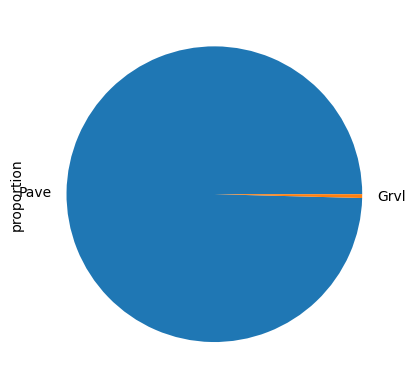

In [45]:
casas_analisis["Street"].value_counts(normalize=True).plot.pie()

En este caso, la varianza ser√° casi cero, por lo que no vale la pena hacer m√°s.

A√∫n as√≠ veremos c√≥mo se comporta el precio de las casas por categor√≠a:

SalePrice    Axes(0.125,0.11;0.775x0.77)
dtype: object

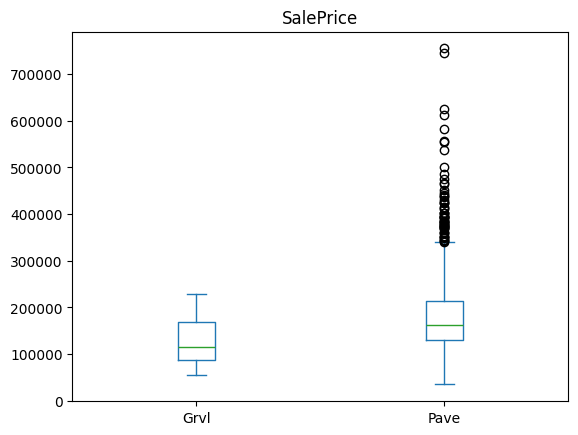

In [46]:
casas_analisis[["Street", "SalePrice"]].plot.box("Street")

Las casas de grava o terracer√≠a parecen tener un precio inferior a las pavimentadas.

### Conclusiones de la exploraci√≥n de Street

Aunque la desproporci√≥n es bastante, es interesante la informaci√≥n sobre que si la casa no est√° pavimentada su precio ser√° inferior. Sin embargo, la desproporci√≥n es alta, menos del $0.5\%$ caer√° en estos casos, por lo que considerarla en un an√°lisis podr√≠a solo entorpecerlo en lugar de beneficiarlo.

## Columna 4 - Neighborhood

> Tipo de columna: Cualitativo Nominal (multiclase)

Esta columna representa el vecindario al que pertenece la casa.

Inspeccionamos los primeros valores:

In [47]:
casas_analisis["Neighborhood"].head()

0    CollgCr
1    Veenker
2    CollgCr
3    Crawfor
4    NoRidge
Name: Neighborhood, dtype: object

Otra vez es una columna categ√≥rica, por lo que contaremos cu√°ntos registros hay en cada clase:

In [48]:
casas_analisis["Neighborhood"].value_counts()

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

Observamos que hay bastantes clases y algunas dominan m√°s.

En proporciones tenemos:

In [49]:
casas_analisis["Neighborhood"].value_counts(normalize=True)

Neighborhood
NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
SawyerW    0.040411
BrkSide    0.039726
Crawfor    0.034932
Mitchel    0.033562
NoRidge    0.028082
Timber     0.026027
IDOTRR     0.025342
ClearCr    0.019178
StoneBr    0.017123
SWISU      0.017123
MeadowV    0.011644
Blmngtn    0.011644
BrDale     0.010959
Veenker    0.007534
NPkVill    0.006164
Blueste    0.001370
Name: proportion, dtype: float64

Observamos que algunas categor√≠as como `Veenker`, `NPkVill` y `Blueste` tienen menos del $1\%$ de los registros. Por lo que debemos tener cuidado al procesarlos.

Dada la gran cantidad de columnas, en lugar de hacer un tratamiento *One-Hot* o *Dummies*, podemos interpretar el precio promedio en cada clase:

In [50]:
casas_analisis[["Neighborhood", "SalePrice"]].groupby("Neighborhood").mean()

SalePrice
Neighborhood               
Blmngtn       194870.882353
Blueste       137500.000000
BrDale        104493.750000
BrkSide       124834.051724
ClearCr       212565.428571
CollgCr       197965.773333
Crawfor       210624.725490
Edwards       128219.700000
Gilbert       192854.506329
IDOTRR        100123.783784
MeadowV        98576.470588
Mitchel       156270.122449
NAmes         145847.080000
NPkVill       142694.444444
NWAmes        189050.068493
NoRidge       335295.317073
NridgHt       316270.623377
OldTown       128225.300885
SWISU         142591.360000
Sawyer        136793.135135
SawyerW       186555.796610
Somerst       225379.837209
StoneBr       310499.000000
Timber        242247.447368
Veenker       238772.727273

Visualicemos estos promedios:

<Axes: xlabel='Neighborhood'>

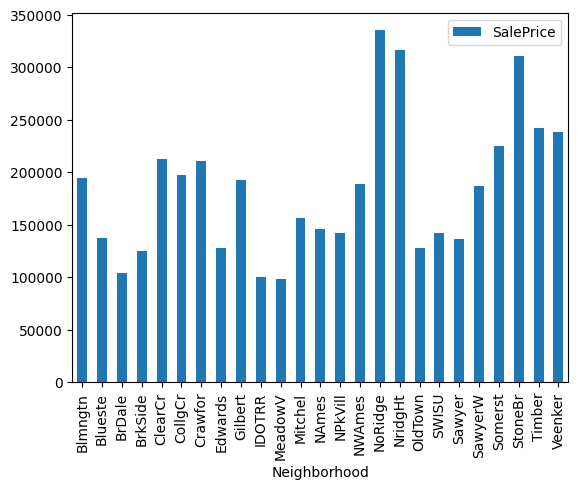

In [51]:
casas_analisis[["Neighborhood", "SalePrice"]].groupby("Neighborhood").mean().plot.bar()

Estos promedios son en realidad el l√≠mite de ver las cajas de c√≥mo se dispersa el precio de venta en cada tipo de vecindario:

<Axes: xlabel='SalePrice', ylabel='Neighborhood'>

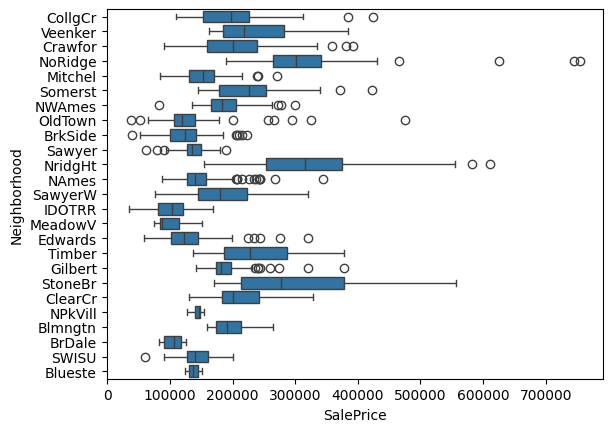

In [52]:
seaborn.boxplot(casas_analisis, x="SalePrice", y="Neighborhood")

Visualizamos las cajas al rev√©s para no configurar la rotaci√≥n de etiquetas.

Observamos algunos puntos at√≠picos, pero en general los precios m√°s altos los tiene `NoRidge` y `NridgHt`, mientras que los m√°s bajos los tiene `IDOTRR` y `MeadowV`.

Esto lo podemos ver mejor si ordenamos previamente:

In [53]:
casas_analisis[["Neighborhood", "SalePrice"]].groupby("Neighborhood").mean().sort_values(by="SalePrice", ascending=False)

SalePrice
Neighborhood               
NoRidge       335295.317073
NridgHt       316270.623377
StoneBr       310499.000000
Timber        242247.447368
Veenker       238772.727273
Somerst       225379.837209
ClearCr       212565.428571
Crawfor       210624.725490
CollgCr       197965.773333
Blmngtn       194870.882353
Gilbert       192854.506329
NWAmes        189050.068493
SawyerW       186555.796610
Mitchel       156270.122449
NAmes         145847.080000
NPkVill       142694.444444
SWISU         142591.360000
Blueste       137500.000000
Sawyer        136793.135135
OldTown       128225.300885
Edwards       128219.700000
BrkSide       124834.051724
BrDale        104493.750000
IDOTRR        100123.783784
MeadowV        98576.470588

<Axes: ylabel='Neighborhood'>

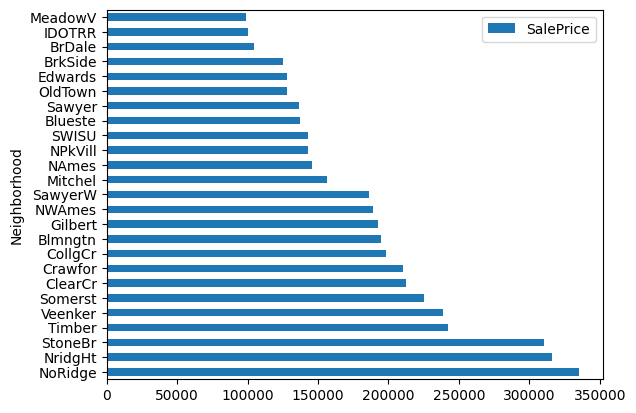

In [54]:
casas_analisis[["Neighborhood", "SalePrice"]].groupby("Neighborhood").mean().sort_values(by="SalePrice", ascending=False).plot.barh()

Podemos mezclar esta informaci√≥n en el conjunto de datos original, para saber de cada vecindario el precio promedio del precio de venta, generando una nueva columna con codificaci√≥n tipo *Mean - Encoder*.

In [55]:
precioPromedioVecindario = casas_analisis[["Neighborhood", "SalePrice"]].groupby("Neighborhood").mean()

precioPromedioVecindario

SalePrice
Neighborhood               
Blmngtn       194870.882353
Blueste       137500.000000
BrDale        104493.750000
BrkSide       124834.051724
ClearCr       212565.428571
CollgCr       197965.773333
Crawfor       210624.725490
Edwards       128219.700000
Gilbert       192854.506329
IDOTRR        100123.783784
MeadowV        98576.470588
Mitchel       156270.122449
NAmes         145847.080000
NPkVill       142694.444444
NWAmes        189050.068493
NoRidge       335295.317073
NridgHt       316270.623377
OldTown       128225.300885
SWISU         142591.360000
Sawyer        136793.135135
SawyerW       186555.796610
Somerst       225379.837209
StoneBr       310499.000000
Timber        242247.447368
Veenker       238772.727273

In [56]:
precioPromedioVecindario = casas_analisis.groupby("Neighborhood")["SalePrice"].mean()

casas_analisis.loc[:, ["SalePrice - Neighborhood"]] = casas_analisis["Neighborhood"].map(precioPromedioVecindario)

casas_analisis[["Neighborhood", "SalePrice", "SalePrice - Neighborhood"]].sample(10)

Neighborhood  SalePrice  SalePrice - Neighborhood
368         NAmes     132000             145847.080000
715        NWAmes     165000             189050.068493
114       Crawfor     259500             210624.725490
741        Sawyer     142000             136793.135135
450       OldTown     110000             128225.300885
674         NAmes     140000             145847.080000
143       CollgCr     204000             197965.773333
555       BrkSide     113000             124834.051724
385       Blmngtn     192000             194870.882353
1003       NWAmes     136905             189050.068493

Sin embargo en las cajas vimos muchos puntos at√≠picos, una forma r√°pida de evitar estos sin hacer winsorizado, ser√° usar la mediana en lugar de la media:

In [57]:
precioPromedioVecindario = casas_analisis.groupby("Neighborhood")["SalePrice"].median()

casas_analisis.loc[:, ["SalePrice - Neighborhood"]] = casas_analisis["Neighborhood"].map(precioPromedioVecindario)

casas_analisis[["Neighborhood", "SalePrice", "SalePrice - Neighborhood"]].sample(10)

Neighborhood  SalePrice  SalePrice - Neighborhood
1218      BrkSide      80500                  124300.0
489       MeadowV      86000                   88000.0
890         NAmes     122900                  140000.0
1212      Edwards     113000                  121750.0
456       OldTown      98000                  119000.0
241       OldTown     110500                  119000.0
387       Edwards     125000                  121750.0
1076      OldTown     170000                  119000.0
817       Mitchel     271000                  153500.0
1325       IDOTRR      55000                  103000.0

As√≠ tendremos valores m√°s realistas en cada tipo de vecindario.

Esto lo podemos visualizar como:

<Axes: xlabel='SalePrice', ylabel='Neighborhood'>

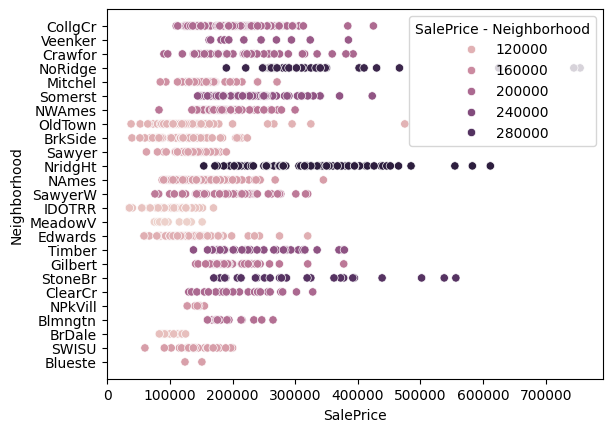

In [58]:
seaborn.scatterplot(casas_analisis, x="SalePrice", y="Neighborhood", hue="SalePrice - Neighborhood")

As√≠ es m√°s f√°cil ubicar en qu√© rango de precios se encuentra cada vecindario.

### Conclusiones de la exploraci√≥n de Neighborhood

La columna que hace referencia al vecindario contiene m√∫ltiples clases que ser√°n dif√≠ciles de manejar en *dummies*, por lo que una codificaci√≥n al promedio de cada categor√≠a es lo m√°s razonable, incluso se puede utilizar la mediana para evitar la sensibilidad a los puntos at√≠picos.

## Columna 5 - YearBuilt

> Tipo de columna: Continua (Serie de tiempo)

Esta columna se refiere a la fecha de construcci√≥n de la casa.

Inspeccionamos los primeros datos:

In [59]:
casas_analisis["YearBuilt"].head()

0    2003
1    1976
2    2001
3    1915
4    2000
Name: YearBuilt, dtype: int64

El a√±o de construicci√≥n indica un valor entero, que puede ser f√°cilmente un valor ordinal o serie de tiempo.

Visualizamos la distribuci√≥n de los a√±os de construcci√≥n:

<Axes: ylabel='Frequency'>

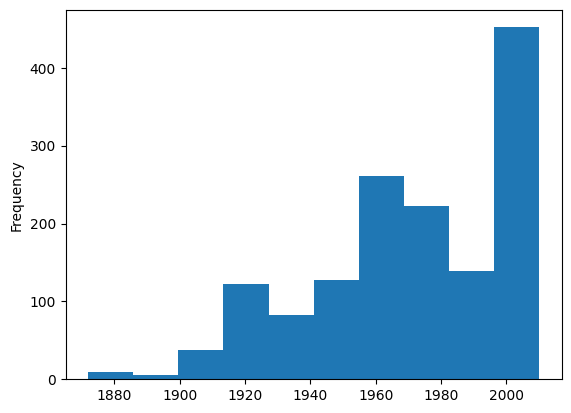

In [60]:
casas_analisis["YearBuilt"].plot.hist()

Vemos que las fechas van desde poco antes de 1880 hasta cerca del 2010.

Visualizaremos si hay relaci√≥n entre el a√±o de construcci√≥n y el precio de venta:

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

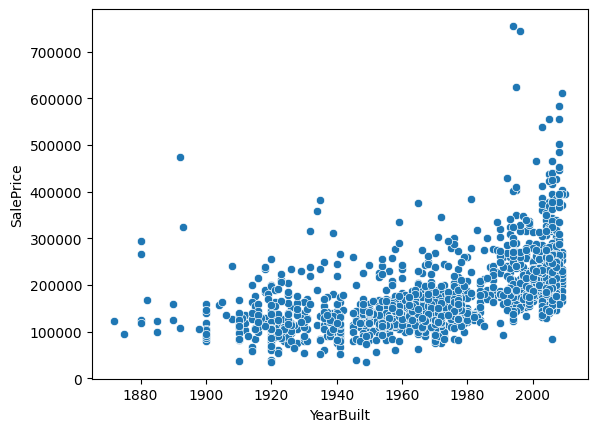

In [61]:
seaborn.scatterplot(casas_analisis, x="YearBuilt", y="SalePrice")

Vemos una ligera tendencia a que conforme aumenta el a√±o sube el rango de los precios, esto es m√°s f√°cil visualizar en cajas:

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

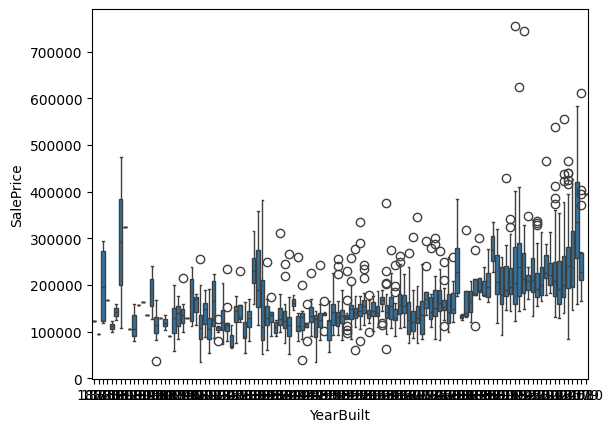

In [62]:
seaborn.boxplot(casas_analisis, x="YearBuilt", y="SalePrice")

Podemos observar que los precios parecen aumentar conforme la fecha avanza, exceptuando los primeros a√±os que parecen at√≠picos.

Visualizamos la dispersi√≥n del a√±o contra el precio y su cuantil de tipo de precio `Barato`, `Normal` y `Caro`:

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

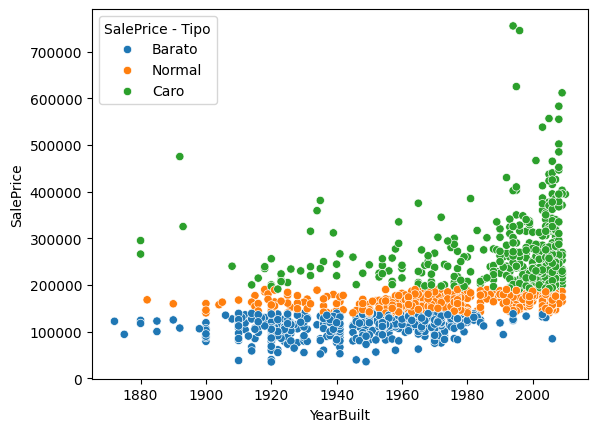

In [63]:
seaborn.scatterplot(casas_analisis, x="YearBuilt", y="SalePrice", hue="SalePrice - Tipo")

Podemos construir los datos que expliquen el precio promedio en cada a√±o:

In [64]:
casas_analisis[["SalePrice", "YearBuilt"]].groupby("YearBuilt").mean()

SalePrice
YearBuilt               
1872       122000.000000
1875        94000.000000
1880       200619.750000
1882       168000.000000
1885       111250.000000
...                  ...
2006       251775.447761
2007       255362.734694
2008       348849.130435
2009       269220.000000
2010       394432.000000

[112 rows x 1 columns]

Visualizamos el precio promedio por a√±o:

<Axes: xlabel='YearBuilt'>

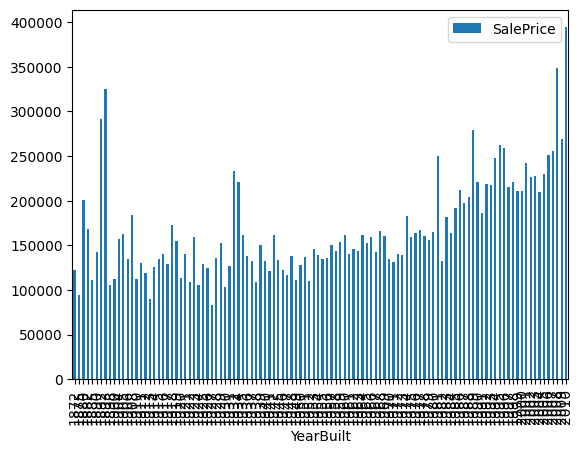

In [65]:
casas_analisis[["SalePrice", "YearBuilt"]].groupby("YearBuilt").mean().plot.bar()

Esto es equivalente a lo que visualizamos anteriormente en las cajas:

SalePrice    Axes(0.125,0.11;0.775x0.77)
dtype: object

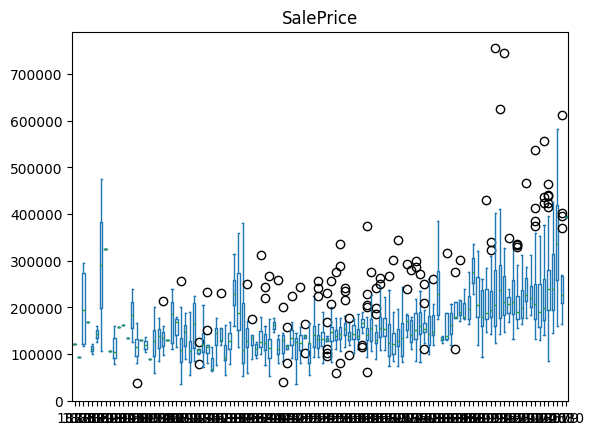

In [66]:
casas_analisis[["SalePrice", "YearBuilt"]].plot.box("YearBuilt")

Ahora podemos preguntarnos cu√°ntos registros caen dentro de cada tipo de precio por a√±o:

In [67]:
casas_analisis[["SalePrice - Tipo", "YearBuilt"]].groupby(["YearBuilt", "SalePrice - Tipo"], observed=True).size().unstack().fillna(0)

SalePrice - Tipo  Barato  Normal  Caro
YearBuilt                             
1872                 1.0     0.0   0.0
1875                 1.0     0.0   0.0
1880                 2.0     0.0   2.0
1882                 0.0     1.0   0.0
1885                 2.0     0.0   0.0
...                  ...     ...   ...
2006                 1.0    13.0  53.0
2007                 0.0    11.0  38.0
2008                 0.0     1.0  22.0
2009                 0.0     3.0  15.0
2010                 0.0     0.0   1.0

[112 rows x 3 columns]

Podemos visualizar estos conteos con un mapa de calor:

<Axes: xlabel='SalePrice - Tipo', ylabel='YearBuilt'>

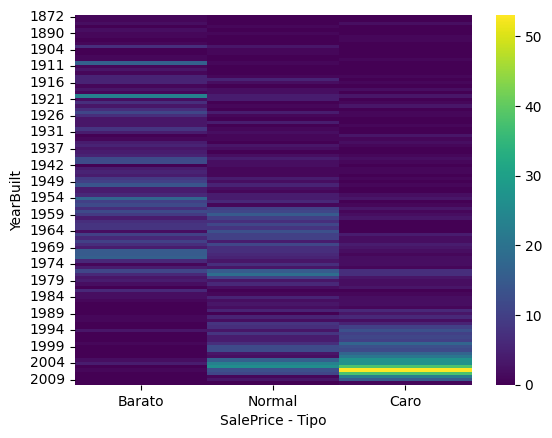

In [68]:
reporte = casas_analisis[["SalePrice - Tipo", "YearBuilt"]].groupby(["YearBuilt", "SalePrice - Tipo"], observed=True).size().unstack().fillna(0)

seaborn.heatmap(reporte, cmap="viridis")

Observamos que los precios de venta caros se acumulan en fechas m√°s recientes al 2010.

Una forma m√°s estable de visualizar esto es mediante la caja que explique por cada tipo de precio el rango de a√±os en el que se distribuye m√°s.

<Axes: xlabel='SalePrice - Tipo', ylabel='YearBuilt'>

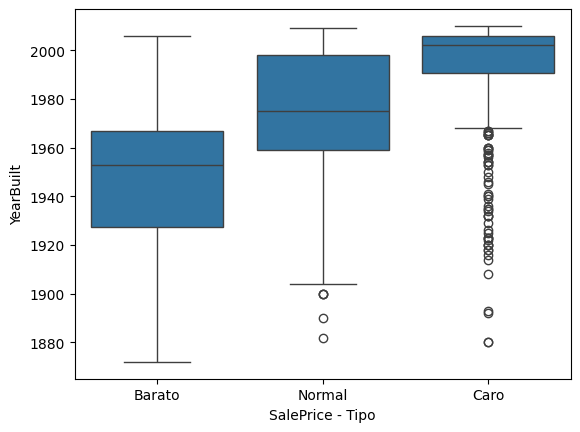

In [69]:
seaborn.boxplot(data=casas_analisis, x="SalePrice - Tipo", y="YearBuilt")

Observamos que para las d√©cadas de los 30s a los 60s las casas eran generalmente baratas, mientras que de los 60s a los 90s las casas tuvieron un precio normal y este se elevo del los 90s al 2010 con precios de casas caros.

Tambi√©n podemos explorar el tama√±o de lotes que se adquirieron:

<Axes: xlabel='SalePrice - Tipo', ylabel='YearBuilt'>

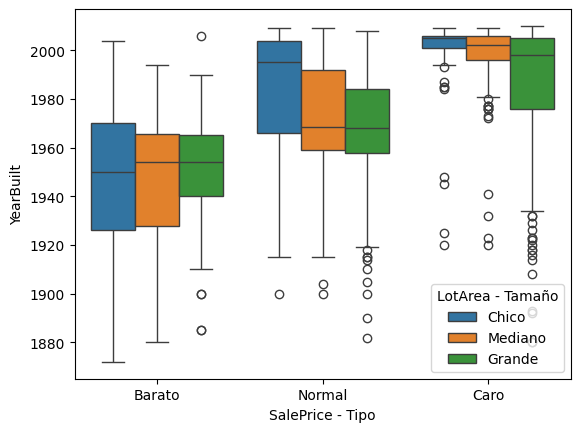

In [70]:
seaborn.boxplot(data=casas_analisis, x="SalePrice - Tipo", y="YearBuilt", hue="LotArea - Tama√±o")

Observamos que los tama√±os de lote tambi√©n se incrementaron en general.

### Conclusiones de la exploraci√≥n de YearBuilt

El explorar el a√±o de construcci√≥n contra el precio de venta, observamos las casa incrementaron su rango de precio hacia los a√±os del 2000 hacia adelante.

Esto refleja una fuerte asociaci√≥n entre el a√±o de construcci√≥n y el precio de la casa, aunque esto se podr√≠a explicar porque el tama√±o de lote tambi√©n increment√≥ en general.

## Columna 6 - OverallCond

> Tipo de columna: Categ√≥rica (multiclase)

Esta columna se refiere a la calidad general de la casa en una escala del 1 al 9:

* **1** - Muy pobre (Very Poor)
* **2** - Pobre (Poor)
* **3** - Regular (Fair)
* **4** - Aceptable inferior (Below Average)
* **5** - Promedio (Average)
* **6** - Aceptable superior (Above Average)
* **7** - Buena (Good)
* **8** - Muy buena (Very Good)
* **9** - Excelente (Excellent)


Inspeccionamos los primeros valores:

In [71]:
casas_analisis["OverallCond"].head()

0    5
1    8
2    5
3    5
4    5
Name: OverallCond, dtype: int64

Contamos cada tipo de condici√≥n general de la casa:

In [72]:
casas_analisis["OverallCond"].value_counts()

OverallCond
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: count, dtype: int64

Vemos que hay muchos datos en una condici√≥n intemedia de $5$, por lo que mostramos la proporci√≥n:

In [73]:
casas_analisis["OverallCond"].value_counts(normalize=True)

OverallCond
5    0.562329
6    0.172603
7    0.140411
8    0.049315
4    0.039041
3    0.017123
9    0.015068
2    0.003425
1    0.000685
Name: proportion, dtype: float64

Entonces $56\%$ de las casas tienen una condici√≥n promedio, mientras que las codiciones `1` y `2` (muy pobre y pobre) representan solo menos del $1\%$ de los datos.

Visualizamos estas distribuciones en forma de barras:

<Axes: xlabel='OverallCond'>

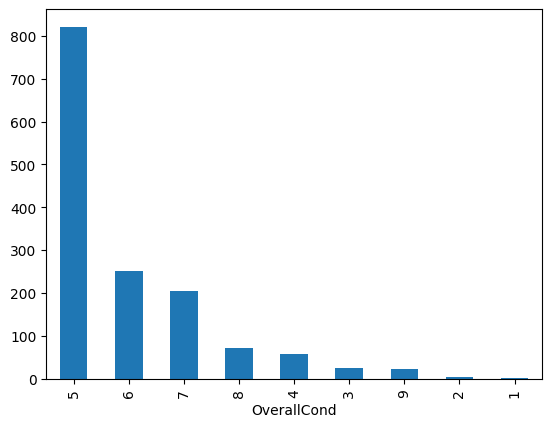

In [74]:
casas_analisis["OverallCond"].value_counts().plot.bar()

Obtenemos los rangos de precio en cada condici√≥n de casa (del `1` al `9`):

SalePrice    Axes(0.125,0.11;0.775x0.77)
dtype: object

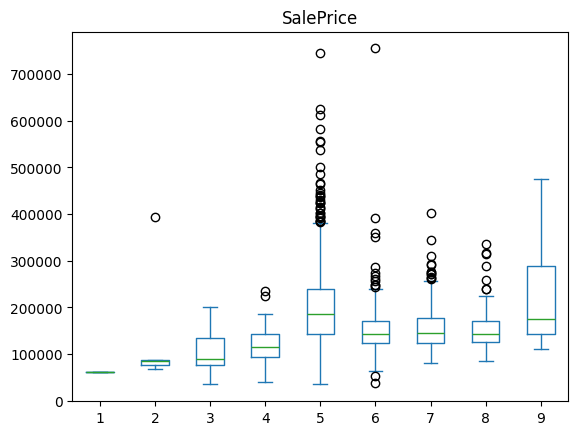

In [75]:
casas_analisis[["OverallCond", "SalePrice"]].plot.box("OverallCond")

Vemos que las casas de mejor condici√≥n tienen un rango superior, hay muchos puntos at√≠picos en las casa de condici√≥n promedio y las casas m√°s baratas tienen el rango inferior.

Podemos ver esta proporci√≥n contando cu√°ntas casas hay por tipo de precio:

In [88]:
casas_analisis[["OverallCond", "SalePrice - Tipo"]].groupby(["OverallCond", "SalePrice - Tipo"], observed=True).size().unstack().fillna(0)

SalePrice - Tipo  Barato  Normal   Caro
OverallCond                            
1                    1.0     0.0    0.0
2                    4.0     0.0    1.0
3                   20.0     3.0    2.0
4                   41.0    14.0    2.0
5                  174.0   270.0  377.0
6                  113.0   100.0   39.0
7                   96.0    65.0   44.0
8                   33.0    30.0    9.0
9                    4.0     9.0    9.0

Visualizamos esta informaci√≥n en un mapa de calor que explique en qu√© condici√≥n est√°n las casas m√°s baratas y las m√°s caras:

<Axes: xlabel='SalePrice - Tipo', ylabel='OverallCond'>

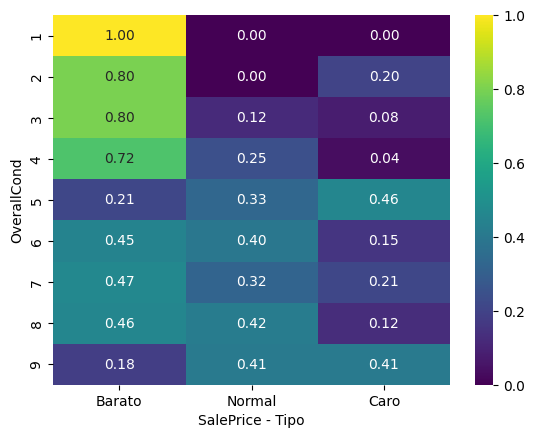

In [99]:
reporte = casas_analisis[["OverallCond", "SalePrice - Tipo"]].groupby(["OverallCond", "SalePrice - Tipo"], observed=True).size().unstack().fillna(0)

reporte = reporte.div(reporte.sum(axis=1), axis=0)

seaborn.heatmap(reporte, cmap="viridis", annot=True, fmt=".2f")

Se aprecia que las casas m√°s baratas est√°n en una condici√≥n pobre, mientras las m√°s caras en una condici√≥n mayor. Aunque los puntos at√≠picos hacen dific√≠l ver esto.

In [95]:
casas_analisis.loc[:, ["OverallCond - Agrupado"]] = casas_analisis["OverallCond"].copy()

casas_analisis.loc[casas_analisis["OverallCond"] <= 4, ["OverallCond - Agrupado"]] = "Pobre"
casas_analisis.loc[casas_analisis["OverallCond"] == 5, ["OverallCond - Agrupado"]] = "Medio"
casas_analisis.loc[casas_analisis["OverallCond"] >= 6, ["OverallCond - Agrupado"]] = "Aceptable"

casas_analisis[["OverallCond", "OverallCond - Agrupado"]].sample(5)

OverallCond OverallCond - Agrupado
143             5                  Medio
1319            5                  Medio
1025            5                  Medio
1059            7              Aceptable
78              5                  Medio

<Axes: xlabel='SalePrice - Tipo', ylabel='OverallCond - Agrupado'>

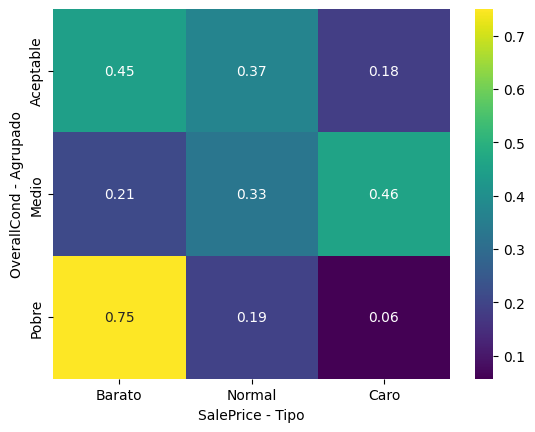

In [98]:
reporte = casas_analisis[["OverallCond - Agrupado", "SalePrice - Tipo"]].groupby(["OverallCond - Agrupado", "SalePrice - Tipo"], observed=True).size().unstack().fillna(0)

reporte = reporte.div(reporte.sum(axis=1), axis=0)

seaborn.heatmap(reporte, cmap="viridis", annot=True, fmt=".2f")

Entonces, ahora es m√°s f√°cil ver que $75\%$ de las casas en condici√≥n pobre son baratas, pero no se logra alcanzar a√∫n la diferencia m√°s marcada en las casas aceptables, a√∫n faltar√≠a quitar los puntos at√≠picos.

### Conclusiones de la exploraci√≥n de OverallCond

La condici√≥n general de la casa puede ayudar a mejorar la predicci√≥n del precio venta si se considera quitar los puntos at√≠picos y quiz√°s reducir el n√∫mero de clases, por ejemplo, si est√° en mala condici√≥n (`1`, `2`, `3` o `4`), si est√° en condici√≥n promedio (`5`) o si est√° en buena condici√≥n o aceptable (`6`, `7`, `8`, `9`).

# Fase 3 - An√°lisis de las columnas 7 a la 11

# Preprocesamiento

### Exploraci√≥n preliminar de la informaci√≥n
### An√°lisis exploratorio de datos

In [ ]:
# Se importa la libreria pandas
import pandas as pd

In [ ]:
df_casas = pd.read_csv("Casas.csv")
df_casas

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

Se tienen 1460 registros

In [ ]:
df_casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

se observa que dtypes nos dice que hay 3 variables flotantes, 35 enteras y 43 posibles variables categ√≥ricas, se puede ver que la variable **Alley** le faltan registros, ya que solo hay 91

In [ ]:
df_casas.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

El **dataframe df_casas** tiene 1460 renglones (observaciones) y 81 columnas (variables), de las 81 variables solo se pide analizar las siguientes:

* MSZoning
* LotArea
* Street
* Neighborhood
* YearBuilt
* OverallCond
* ExterQual
* GrLivArea
* FullBath
* GarageArea
* BsmtCond
* FireplaceQu
* Electrical
* LotFrontage
* KitchenQual
* PavedDrive
* SalePrice (ser√° la variable respuesta)

Por lo que se genera una lista con las variables a analizar:

In [ ]:
columnas_tarea = ['MSZoning', 'LotArea','Street','Neighborhood', 'YearBuilt', 'OverallCond', 'ExterQual',
'GrLivArea','FullBath', 'GarageArea', 'BsmtCond', 'FireplaceQu', 'Electrical', 'LotFrontage', 'KitchenQual', 'PavedDrive', 'SalePrice']

df_casas_tarea = df_casas[columnas_tarea]
df_casas_tarea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSZoning      1460 non-null   object 
 1   LotArea       1460 non-null   int64  
 2   Street        1460 non-null   object 
 3   Neighborhood  1460 non-null   object 
 4   YearBuilt     1460 non-null   int64  
 5   OverallCond   1460 non-null   int64  
 6   ExterQual     1460 non-null   object 
 7   GrLivArea     1460 non-null   int64  
 8   FullBath      1460 non-null   int64  
 9   GarageArea    1460 non-null   int64  
 10  BsmtCond      1423 non-null   object 
 11  FireplaceQu   770 non-null    object 
 12  Electrical    1459 non-null   object 
 13  LotFrontage   1201 non-null   float64
 14  KitchenQual   1460 non-null   object 
 15  PavedDrive    1460 non-null   object 
 16  SalePrice     1460 non-null   int64  
dtypes: float64(1), int64(7), object(9)
memory usage: 194.0+ KB


las variables que se van a trabajar son 1 flotante, 7 variables enteras y 9 categ√≥ricas, del dato # 0 al 15 ser√°n las covariables y el 16 ser√° la respuesta

Se observa que hay valores faltantes para las variables (BsmtCond,FireplaceQu, Electrica y LotFrontage)

Es √∫til conocer el n√∫mero diferente de niveles de variables categ√≥ricas se puede primero generar un marco de datos con puros objetos tipo object y luego concatenar los m√©todos **nunique** y **reset_index** para crear un dataframe con los valores √∫nicos de cada variable categ√≥rica

In [ ]:
# Seleccionan las columnas de tipo 'object'
df_casas_tarea_object = df_casas_tarea.select_dtypes(include = 'object')

# Obtener el n√∫mero de valores √∫nicos para cada columna tipo object
df_casas_tarea_resumen = df_casas_tarea_object.nunique().reset_index()
df_casas_tarea_resumen.columns = ['Variable', 'Valores √∫nicos']

# Se muestra el resumen
print(df_casas_tarea_resumen)

       Variable  Valores √∫nicos
0      MSZoning               5
1        Street               2
2  Neighborhood              25
3     ExterQual               4
4      BsmtCond               4
5   FireplaceQu               5
6    Electrical               5
7   KitchenQual               4
8    PavedDrive               3


la variable con mayor niveles es Neighborhood

In [ ]:
df_casas_tarea_resumen

Variable  Valores √∫nicos
0      MSZoning               5
1        Street               2
2  Neighborhood              25
3     ExterQual               4
4      BsmtCond               4
5   FireplaceQu               5
6    Electrical               5
7   KitchenQual               4
8    PavedDrive               3

## Clasificaci√≥n de covariables


Covariable 7 ExterQual: Eval√∫a la calidad del material del exterior

Tipo de dato: cualitativa (categ√≥rica) ordinal

Sus niveles son:

Ex	Excelente
Gd	Bueno
TA	Media/ t√≠pica
Fa	Regular 
Po	Mala


In [ ]:
df_casas_tarea['ExterQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

Covariable 8 GrLivArea: Superficie habitable por encima del nivel del suelo en pies cuadrados

Tipo de dato: Cuantitativa continua

In [ ]:
df_casas_tarea['GrLivArea'].describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

el √°rea promedio es de 1515.4637 $ft^2$, valor m√≠nimo de superficie habitable es de 334 $ft^2$ y el m√°ximo es de 5642 $ft^2$

Covariable 9 FullBath: Ba√±os completos sobre el nivel del suelo.

Tipo de dato: Cuantitativa discreta


In [ ]:
df_casas_tarea['FullBath'].describe()

count    1460.000000
mean        1.565068
std         0.550916
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: FullBath, dtype: float64

el n√∫mero m√°ximo de ba√±os registrados es 3

Covariable 10 GarageArea: Superificie del garaje en pies cuadrados

Tipo de dato: Cuantitativa continua

In [ ]:
df_casas_tarea['GarageArea'].describe()

count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64

la superficie promedio es de 472.98 $ft^2$ y la m√°xima es de 1418 $ft^2$

Covariable 11 BsmtCond: Eval√∫a el estado general del s√≥tano

Tipo de dato: Cualitativa (categ√≥rica) ordinal

Sus niveles son:

Ex	Excelente 
Gd	Bueno
TA	T√≠pico - se permite una ligera humedad
Fa	Regular - humedad o algunas grietas o asentamientos
Po	Deficiente - grietas graves, asentamientos o humedad
NA Sin s√≥tano

In [ ]:
df_casas_tarea['BsmtCond'].unique()
df_casas_tarea['BsmtCond'].describe()

count     1423
unique       4
top         TA
freq      1311
Name: BsmtCond, dtype: object

hay un problema ya que se tienen datos , hay 1423 registros de 1460

## Tratamiento de datos faltantes

In [ ]:

# porcentaje de valores faltantes por columna
datos_faltantes = df_casas_tarea.isnull().mean()*100

# mostrar solo columnas con al mneos un valor faltante

datos_faltantes = datos_faltantes[datos_faltantes> 0].sort_values(ascending= False)

print(datos_faltantes)


FireplaceQu    47.260274
LotFrontage    17.739726
BsmtCond        2.534247
Electrical      0.068493
dtype: float64


Se realiza el tratamiento de datos para "BsmtCond"

In [ ]:
# Verificar el porcentaje de valores faltantes
porcentaje_faltantes = df_casas_tarea["BsmtCond"].isnull().mean() * 100
print(f"Porcentaje de valores faltantes en BsmtCond: {porcentaje_faltantes:.2f}%")

# Si el porcentaje es menor al 5%, eliminar esos registros
if porcentaje_faltantes < 5:
    df_casas_tarea = df_casas_tarea.dropna(subset=["BsmtCond"])
    print("Filas con valores faltantes en BsmtCond eliminadas.")
else:
    print("M√°s del 5% de los datos faltan en BsmtCond. No se eliminaron filas.")

# Mostrar el nuevo n√∫mero de observaciones
print(f"Nuevo tama√±o del DataFrame: {df_casas_tarea.shape}")


Porcentaje de valores faltantes en BsmtCond: 0.00%
Filas con valores faltantes en BsmtCond eliminadas.
Nuevo tama√±o del DataFrame: (1423, 17)


## An√°lisis de la distribuci√≥n de la respuesta y relaci√≥n de la respuesta con las preditoras.

**1. SalePrice vs Variables Continuas**
Se analizar√°n con:

* Correlaci√≥n de Pearson

* Gr√°fica de dispersi√≥n (scatter plot)

Variables continuas:

* LotArea

* GrLivArea

* GarageArea

* LotFrontage

Correlaci√≥n de LotArea con SalePrice: 0.2638


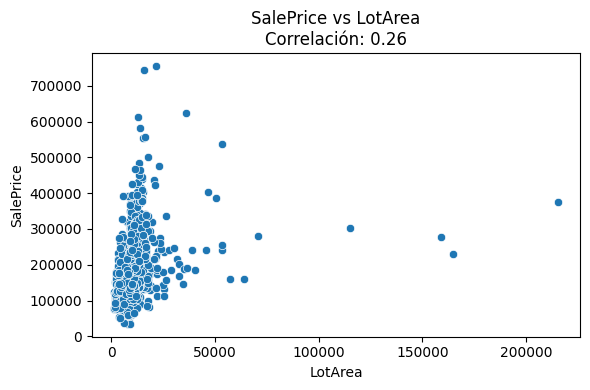

Correlaci√≥n de GrLivArea con SalePrice: 0.7093


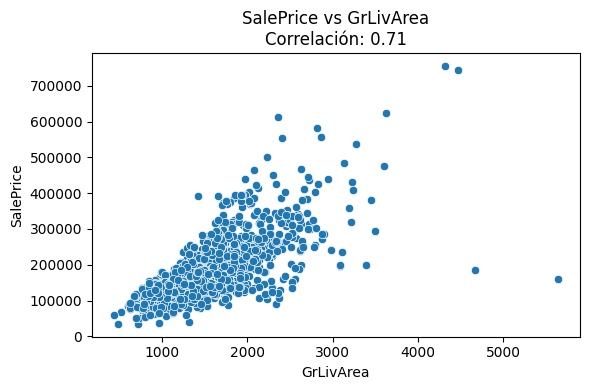

Correlaci√≥n de GarageArea con SalePrice: 0.6226


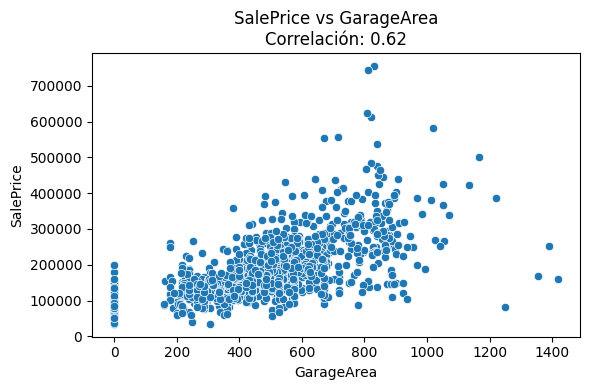

Correlaci√≥n de LotFrontage con SalePrice: 0.3520


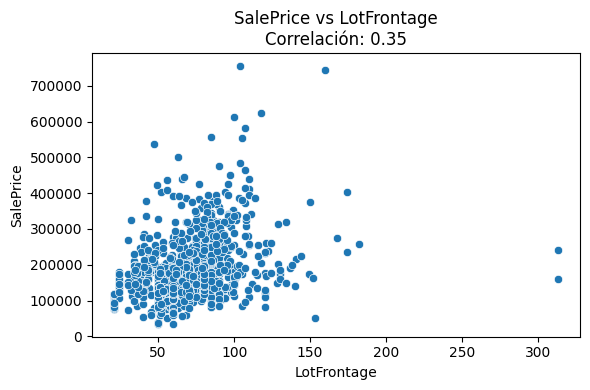

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de variables continuas
continuas = ["LotArea", "GrLivArea", "GarageArea", "LotFrontage"]

# C√°lculo de correlaciones y gr√°ficas de dispersi√≥n
for var in continuas:
    correlacion = df_casas_tarea[[var, "SalePrice"]].corr().iloc[0, 1]
    print(f"Correlaci√≥n de {var} con SalePrice: {correlacion:.4f}")
    
    # Gr√°fica de dispersi√≥n
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df_casas_tarea, x=var, y="SalePrice")
    plt.title(f"SalePrice vs {var}\nCorrelaci√≥n: {correlacion:.2f}")
    plt.xlabel(var)
    plt.ylabel("SalePrice")
    plt.tight_layout()
    plt.show()


La √∫nica que muestra una correlaci√≥n considerable de 0.72 es GrLivArea que es la superficie habitable, por lo que a mayor superficie es m√°s cara

**2. SalePrice vs Variables Discretas (tipo conteo)**
Se analizar√°n con:

Estas variables son num√©ricas, pero representan conteos o calificaciones discretas, por eso analizamos: Correlaci√≥n de Pearson y gr√°fica de dispersi√≥n para ver las tendencias

    Variables discretas:

* FullBath

* YearBuilt

* OverallCond

Correlaci√≥n de FullBath con SalePrice: 0.5735


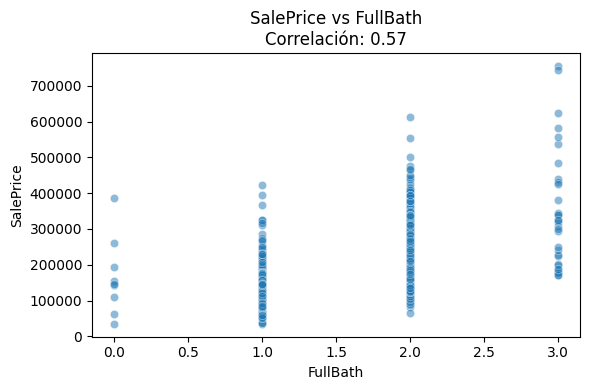

Correlaci√≥n de YearBuilt con SalePrice: 0.5186


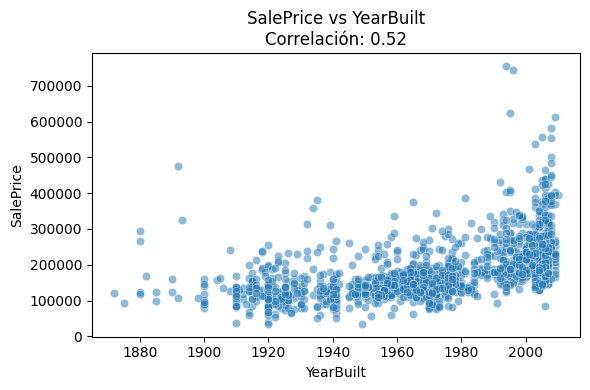

Correlaci√≥n de OverallCond con SalePrice: -0.0954


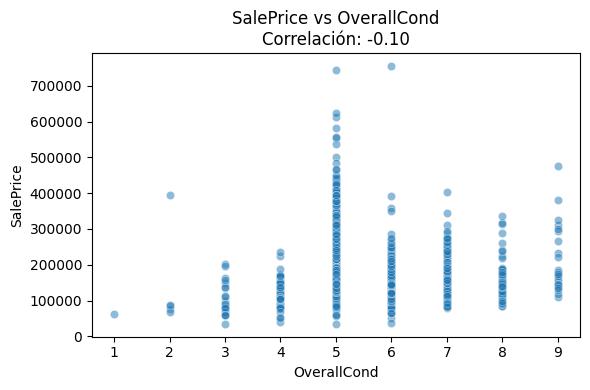

In [ ]:
# Lista de variables discretas
discretas = ["FullBath", "YearBuilt", "OverallCond"]

# C√°lculo de correlaciones y gr√°ficas de dispersi√≥n
for var in discretas:
    correlacion = df_casas_tarea[[var, "SalePrice"]].corr().iloc[0, 1]
    print(f"Correlaci√≥n de {var} con SalePrice: {correlacion:.4f}")
    
    # Gr√°fica de dispersi√≥n
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df_casas_tarea, x=var, y="SalePrice", alpha=0.5)
    plt.title(f"SalePrice vs {var}\nCorrelaci√≥n: {correlacion:.2f}")
    plt.xlabel(var)
    plt.ylabel("SalePrice")
    plt.tight_layout()
    plt.show()


**3. SalePrice vs Variables Ordinales o Nominales**
Se analizar√°n con:

* Gr√°fica de cajas (boxplot) para comparar distribuci√≥n de precios entre categor√≠as

Variables ordinales/nominales:

* MSZoning

* Street

* Neighborhood

* ExterQual

* BsmtCond

* FireplaceQu

* Electrical

* KitchenQual

* PavedDrive

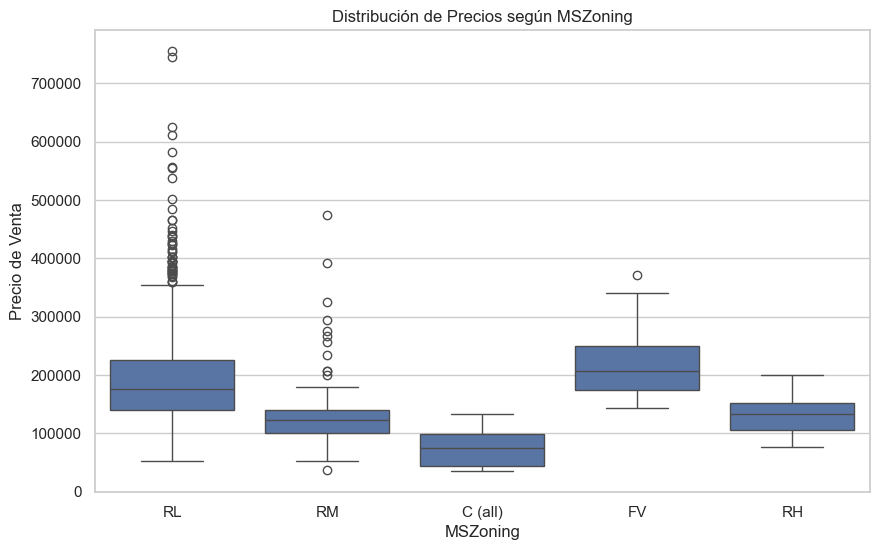

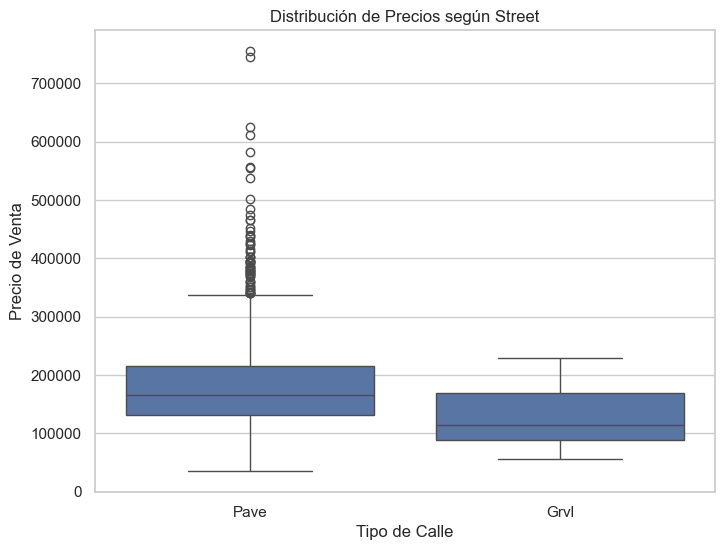

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configuraci√≥n general de estilo
sns.set(style="whitegrid")

# Boxplot para MSZoning vs SalePrice
plt.figure(figsize=(10,6))
sns.boxplot(x='MSZoning', y='SalePrice', data=df_casas_tarea)
plt.title('Distribuci√≥n de Precios seg√∫n MSZoning')
plt.xlabel('MSZoning')
plt.ylabel('Precio de Venta')
plt.show()

# Boxplot para Street vs SalePrice
plt.figure(figsize=(8,6))
sns.boxplot(x='Street', y='SalePrice', data=df_casas_tarea)
plt.title('Distribuci√≥n de Precios seg√∫n Street')
plt.xlabel('Tipo de Calle')
plt.ylabel('Precio de Venta')
plt.show()


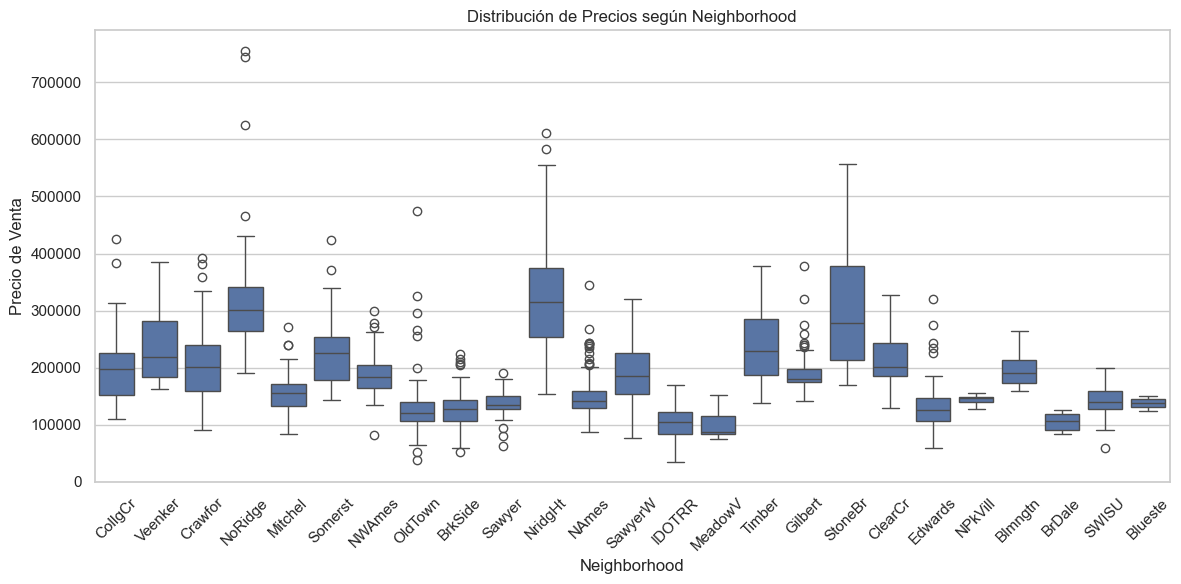

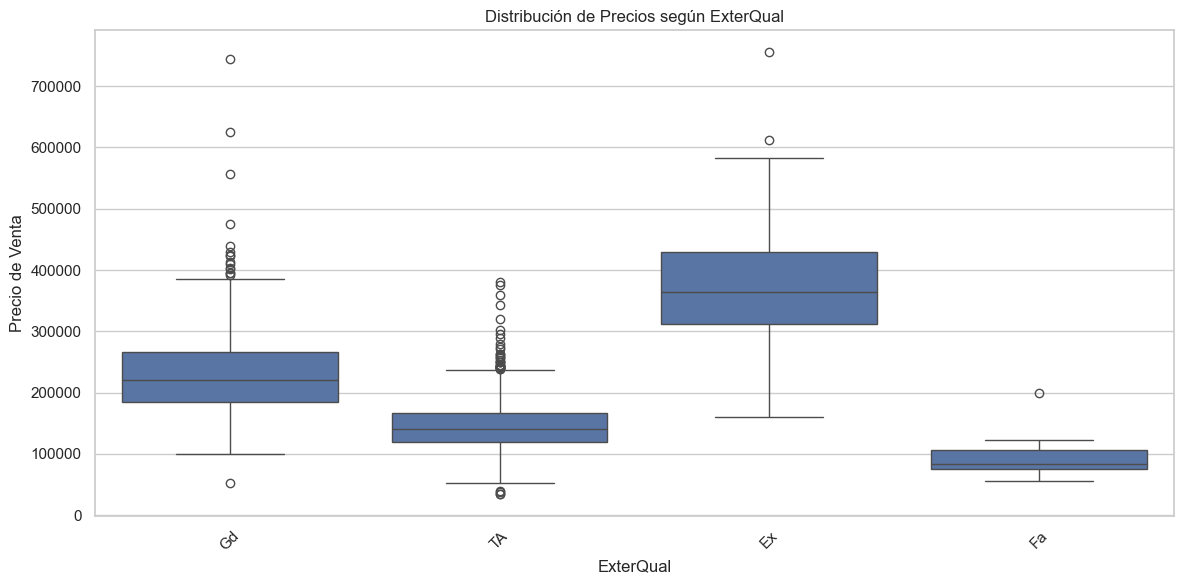

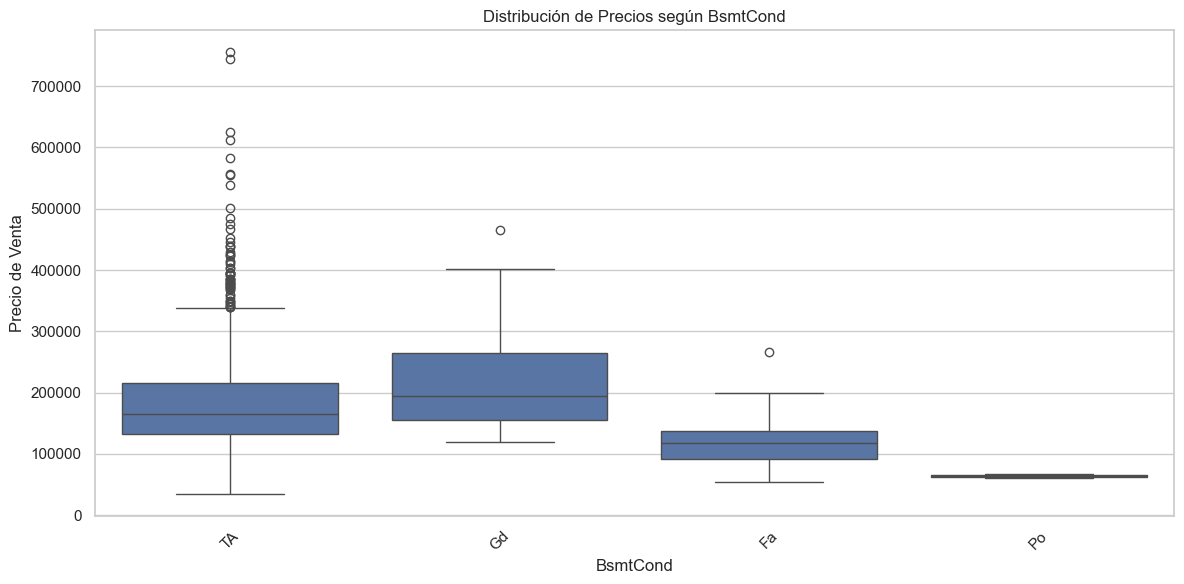

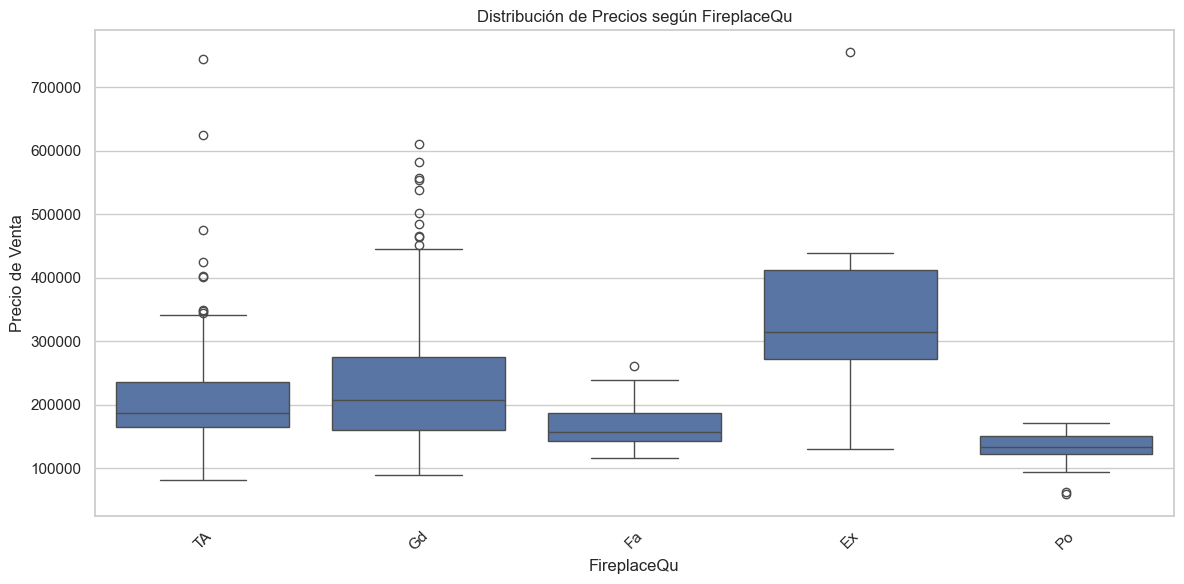

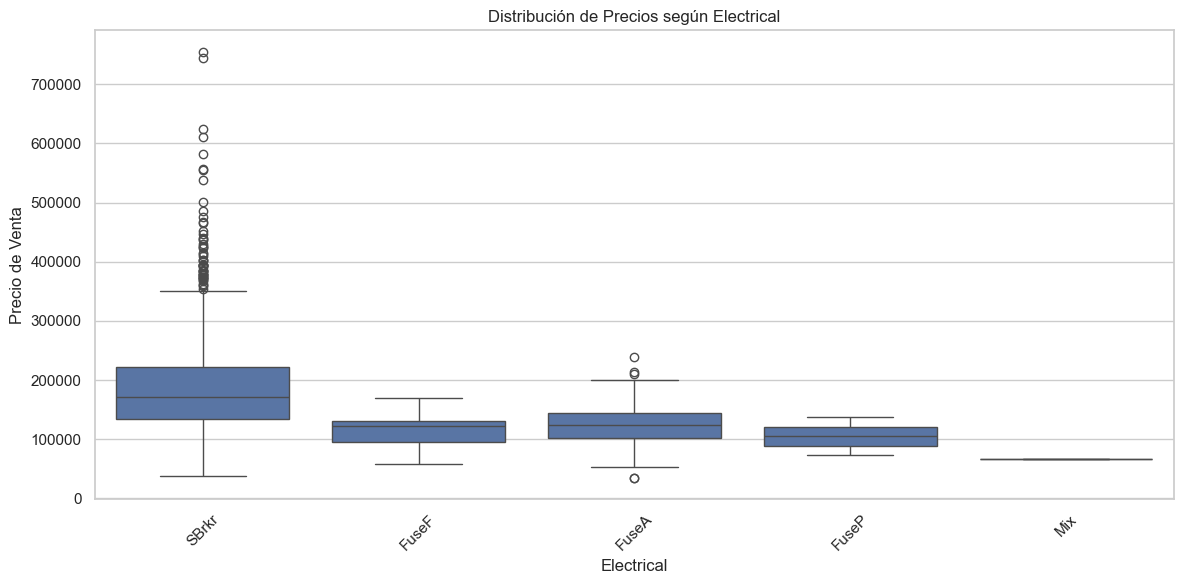

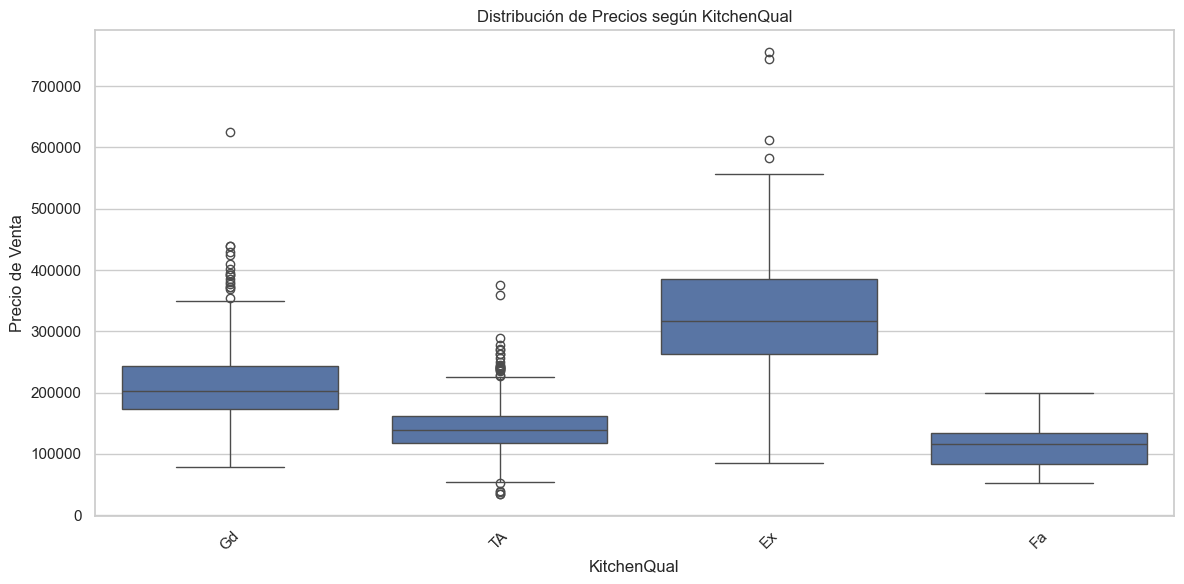

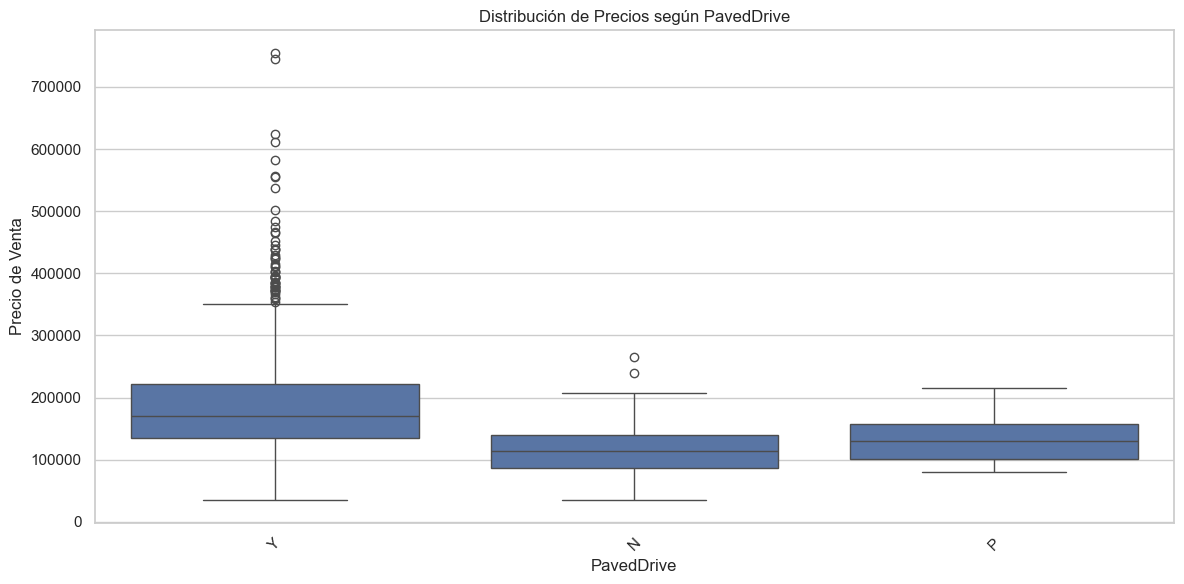

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista con las variables categ√≥ricas a graficar
variables_categoricas = ['Neighborhood', 'ExterQual', 'BsmtCond', 'FireplaceQu', 'Electrical', 'KitchenQual', 'PavedDrive']

sns.set(style="whitegrid")

for var in variables_categoricas:
    plt.figure(figsize=(12,6))  # Tama√±o uniforme para todas
    sns.boxplot(x=var, y='SalePrice', data=df_casas_tarea)
    plt.title(f'Distribuci√≥n de Precios seg√∫n {var}')
    plt.xlabel(var)
    plt.ylabel('Precio de Venta')
    plt.xticks(rotation=45)  # Rota etiquetas para mejor lectura para varias categor√≠as
    plt.tight_layout()  # Ajusta para que no se corten las etiquetas
    plt.show()


# Fase 3 - An√°lisis de las columnas 12 a la 16

## üîπ Montaje de Google Drive y carga de los archivos

Se Realiza la carga de las librer√≠as, se monta Google Drive para poder acceder a los archivos de forma sencilla, que son los archivos del dataset, que existen en la carpeta /content de Colab Notebooks y que se corresponden a las variables casas, casas_kaggle.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np

ruta = '/content/drive/MyDrive/Colab Notebooks/content/'
casas = pd.read_csv(ruta + 'Casas.csv')
casas_kaggle = pd.read_csv(ruta + 'Casas_Kaggle.csv')



## üîπ Selecci√≥n de variables y reemplazo l√≥gico de valores faltantes

En esta parte se selecciona el subconjunto de variables indicadas por el profesor y se imputan valores l√≥gicos en variables donde Nan representa la ausencia de una cualidad (como chimenea o s√≥tano).


In [2]:
variables = [
    'SalePrice', 'MSZoning', 'LotArea', 'Street', 'Neighborhood', 'YearBuilt',
    'OverallCond', 'ExterQual', 'GrLivArea', 'FullBath', 'GarageArea',
    'BsmtCond', 'FireplaceQu', 'Electrical', 'LotFrontage', 'KitchenQual', 'PavedDrive'
]

casas = casas[variables].copy()
casas_kaggle = casas_kaggle[[v for v in variables if v != 'SalePrice']].copy()

# Imputaci√≥n l√≥gica para cualidades ausentes
for col in ['FireplaceQu', 'BsmtCond']:
    casas.loc[:, col] = casas[col].fillna('None')
    casas_kaggle.loc[:, col] = casas_kaggle[col].fillna('None')




## üîπ Instalaci√≥n del entorno R y del paquete missForest

Se instala rpy2 para correr c√≥digo de R desde Python. Tambi√©n se instala y carga el paquete missForest, que permite imputar valores faltantes mediante √°rboles aleatorios en R.


In [ ]:
!pip install -q rpy2
%load_ext rpy2.ipython


In [697]:
%%R
install.packages("missForest")
library(missForest)


--- Please select a CRAN mirror for use in this session ---

The downloaded binary packages are in
	/var/folders/zr/py0pd6bs6gnfzg9ljbgr9v0c0000gn/T//RtmpVeupUj/downloaded_packages


probando la URL 'https://cran.itam.mx/bin/macosx/big-sur-arm64/contrib/4.4/missForest_1.5.tgz'
Content type 'application/x-gzip' length 343906 bytes (335 KB)
downloaded 335 KB



## üîπ Imputaci√≥n de datos faltantes usando el algoritmo MissForest en R

En esta secci√≥n se realiza la imputaci√≥n de datos faltantes usando el algoritmo **MissForest**, que es una t√©cnica basada en bosques aleatorios (Random Forests) para imputar tanto variables num√©ricas como categ√≥ricas de manera no param√©trica.

Dado que el algoritmo original est√° implementado en R, se utiliza la interfaz rpy2 para ejecutar c√≥digo R desde Google Colab.

####  Procedimiento realizado:

1. Se envi√≥ el DataFrame casas de Python a R como casas_r.
2. Se convirtieron las columnas categ√≥ricas (character) en factores (factor), tal como lo requiere MissForest.
3. Se ejecut√≥ missForest() con semilla aleatoria fija (set.seed(123)) para garantizar reproducibilidad.
4. Despu√©s de la imputaci√≥n, los factores se **convirtieron nuevamente a texto (character)** para evitar que las categor√≠as regresaran a Python como valores num√©ricos (por ejemplo, "RL" ‚Üí 4).
5. Finalmente, se recuper√≥ el DataFrame imputado (casas_imputadas) de vuelta en Python y se guard√≥ como casas_preprocesadas.csv.

Es importante mencionar que ciertos valores como "None" (por ejemplo, en la columna FireplaceQu) **no son considerados datos faltantes reales**, sino categor√≠as v√°lidas que indican la ausencia de una caracter√≠stica (por ejemplo, ausencia de chimenea), y por tanto **no fueron imputados**, sino preservados.


In [ ]:
from rpy2.robjects import pandas2ri, globalenv
pandas2ri.activate()

casas_r = casas.copy()
casas_r.replace("NA", np.nan, inplace=True)
globalenv['casas_r'] = pandas2ri.py2rpy(casas_r)

In [707]:
%%R
# Convertimos columnas tipo "character" a "factor"
for (col in names(casas_r)) {
  if (class(casas_r[[col]]) == "character") {
    casas_r[[col]] <- as.factor(casas_r[[col]])
  }
}

set.seed(123)
casas_imputadas <- missForest(casas_r)$ximp

# Convertimos los factores resultantes a texto para no perder etiquetas
casas_imputadas[] <- lapply(casas_imputadas, function(x) {
  if (is.factor(x)) as.character(x) else x
})


In [709]:
#Recuperamos el archivo a python y guardamos el archivo imputado
casas_final = pandas2ri.rpy2py(globalenv['casas_imputadas'])
casas_final.to_csv(ruta + 'casas_preprocesadas.csv', index=False)



# üîπ Imputaci√≥n multivariada con missForest (Casas_Kaggle.csv)

Se repite el mismo proceso de imputaci√≥n para el conjunto de prueba Casas_Kaggle.csv. El objetivo es mantener consistencia con los datos de entrenamiento.


In [ ]:
casas_kaggle_r = casas_kaggle.copy()
casas_kaggle_r.replace("NA", np.nan, inplace=True)
globalenv['casas_kaggle_r'] = pandas2ri.py2rpy(casas_kaggle_r)


In [ ]:
%%R
# Convertimos columnas tipo "character" a "factor"
for (col in names(casas_kaggle_r)) {
  if (class(casas_kaggle_r[[col]]) == "character") {
    casas_kaggle_r[[col]] <- as.factor(casas_kaggle_r[[col]])
  }
}

set.seed(123)
casas_kaggle_imputadas <- missForest(casas_kaggle_r)$ximp

# Convertimos factores a texto para que no regresen como n√∫meros
casas_kaggle_imputadas[] <- lapply(casas_kaggle_imputadas, function(x) {
  if (is.factor(x)) as.character(x) else x
})


In [ ]:
#Recuperamos el archivo a python y guardamos el archivo imputado
casas_kaggle_final = pandas2ri.rpy2py(globalenv['casas_kaggle_imputadas'])
casas_kaggle_final.to_csv(ruta + 'casas_kaggle_preprocesadas.csv', index=False)

## üîπ An√°lisis de la distribuci√≥n de SalePrice

En esta secci√≥n se analiza la distribuci√≥n de la variable de respuesta SalePrice (precio de venta de las casas). Para ello, se utiliz√≥ un histograma acompa√±ado de una curva KDE (Kernel Density Estimation), que nos permite observar la forma de la distribuci√≥n de los datos.

Este an√°lisis ayuda a identificar si los precios siguen una distribuci√≥n normal o si est√°n sesgados, lo cual es importante para futuras transformaciones, modelado o interpretaci√≥n de resultados.




La distribuci√≥n de SalePrice es asim√©trica hacia la derecha, con la mayor√≠a de los precios concentrados entre 100,000 y 200,000. Hay pocas viviendas con precios muy altos, lo que genera una cola larga. Esta forma sugiere que no sigue una distribuci√≥n normal, algo a considerar si se aplican modelos sensibles a la forma de la variable.



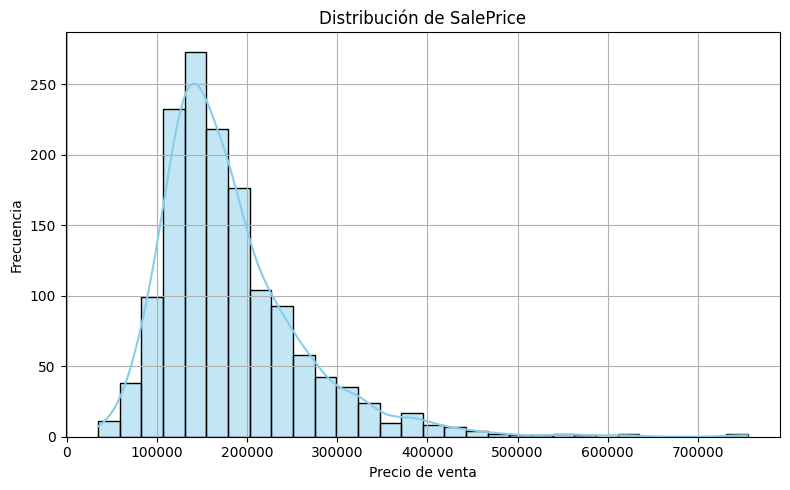

In [ ]:
# Distribuci√≥n de SalePrice con histograma y curva KDE

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#ruta = '/content/drive/MyDrive/Colab Notebooks/content/'
ruta = ""
casas_final = pd.read_csv(ruta + 'casas_preprocesadas.csv')

# Asegurar que SalePrice sea num√©rico y eliminar NaNs
casas_final['SalePrice'] = pd.to_numeric(casas_final['SalePrice'], errors='coerce')
saleprice_data = casas_final['SalePrice'].dropna()

plt.figure(figsize=(8, 5))
sns.histplot(saleprice_data, kde=True, color='skyblue', bins=30)
plt.title('Distribuci√≥n de SalePrice')
plt.xlabel('Precio de venta')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()


## üîπ Relaci√≥n de SalePrice con variables continuas

En esta secci√≥n se estudia la relaci√≥n entre SalePrice y diferentes variables continuas como LotArea, YearBuil, GrLivArea, GarageArea y LotFrontage. Estas variables tienen un car√°cter num√©rico y representan dimensiones f√≠sicas o caracter√≠sticas medibles de las propiedades.

Se generaron gr√°ficos de dispersi√≥n (scatterplots) para visualizar la correlaci√≥n entre cada variable y el precio de venta. Estos gr√°ficos permiten identificar tendencias lineales, agrupamientos, valores at√≠picos y posibles relaciones que podr√≠an ser √∫tiles en el modelado predictivo.


1. **LotArea:** Hay muchos puntos con √°reas peque√±as, lo que hace dif√≠cil notar una tendencia clara. Aunque hay terrenos grandes con precios altos, tambi√©n encontramos algunos que son raros y est√°n por ah√≠.
2. **YearBuilt:** Se nota que las casas m√°s nuevas suelen venderse a precios m√°s altos. Desde el a√±o 2000, los precios han subido bastante.
3. **GrLivArea:** Esta variable se relaciona claramente con el precio de venta. Cuanto m√°s grande es el √°rea habitable, m√°s alto es el precio. Es una de las que mejor se parece al precio en los gr√°ficos.
4. **GarageArea:** Tambi√©n tiene una relaci√≥n positiva con el precio de venta. No es tan fuerte como la de GrLivArea, pero el tama√±o del garaje s√≠ afecta el valor, sobre todo cuando tiene entre 400 y 500 unidades.
5. **LotFrontage:** Hay una ligera tendencia al alza, aunque los datos est√°n m√°s dispersos. Algunos lotes con frentes grandes no siempre tienen precios m√°s altos, as√≠ que esa relaci√≥n no es muy fuerte.

En general, GrLivArea y YearBuilt parecen ser las variables continuas que m√°s influyen en SalePrice.

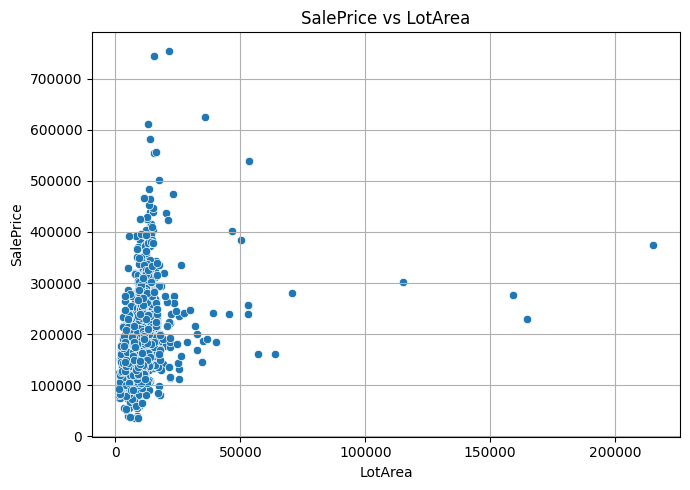

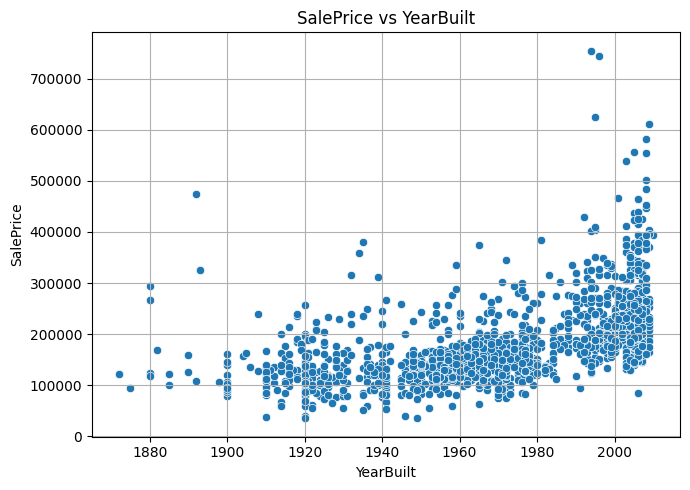

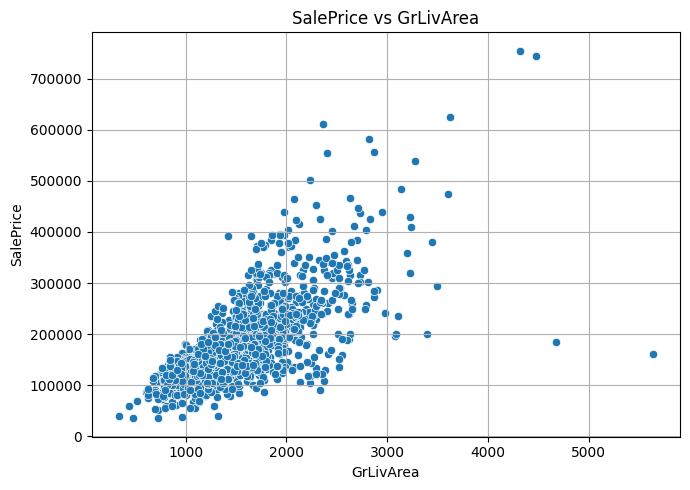

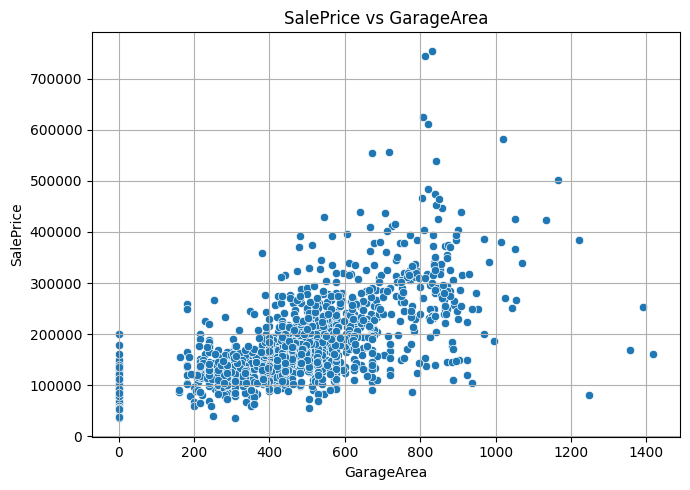

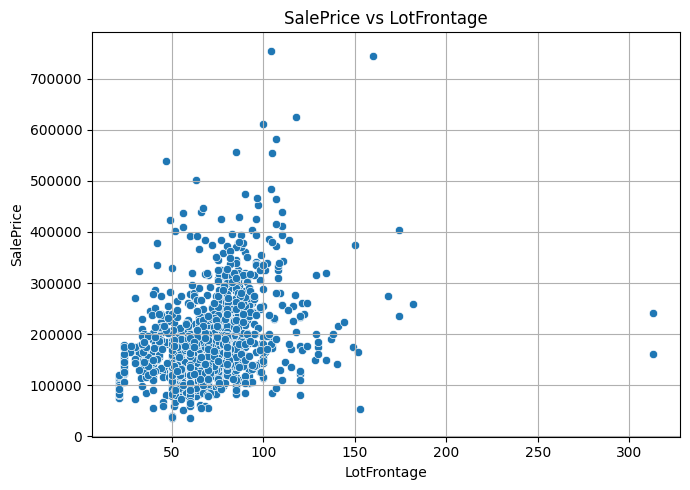

In [ ]:
# Relaci√≥n de SalePrice con variables continuas

variables_continuas = ['LotArea', 'YearBuilt', 'GrLivArea', 'GarageArea', 'LotFrontage']

# Verificar que existan y que sean num√©ricas
for col in variables_continuas:
    if col in casas_final.columns:
        casas_final[col] = pd.to_numeric(casas_final[col], errors='coerce')
        plt.figure(figsize=(7, 5))
        sns.scatterplot(data=casas_final, x=col, y='SalePrice')
        plt.title(f'SalePrice vs {col}')
        plt.xlabel(col)
        plt.ylabel('SalePrice')
        plt.grid(True)
        plt.tight_layout()
        plt.show()


## üîπ Relaci√≥n de SalePrice con variables ordinales o categ√≥ricas

En esta secci√≥n se analiza c√≥mo var√≠a SalePrice respecto a variables categ√≥ricas de tipo ordinal, como ExterQual, FireplaceQu, BsmtCond y KitchenQual. Estas variables describen caracter√≠sticas cualitativas de las casas, usualmente con niveles de calidad o condici√≥n.

Se utilizaron diagramas de caja (boxplots) para comparar la distribuci√≥n del precio de venta entre los diferentes niveles de cada variable. Esto permite observar si existen diferencias sistem√°ticas en el precio seg√∫n el nivel cualitativo, lo cual es clave para el an√°lisis de impacto de calidad y dise√±o en el valor final de las viviendas.


1. KitchenQual: Se ve una tendencia bastante clara: las casas con cocinas de alta calidad (Ex) se venden por mucho m√°s que las que tienen calidad regular (TA) o baja (Fa). As√≠ que parece que la cocina juega un papel importante en el valor de la casa.

2. ExterQual: Algo parecido pasa con las casas que tienen mejores acabados exteriores (Ex), ya que su valor de mercado tambi√©n es m√°s alto. Los boxplots muestran diferencias bastante marcadas entre las calidades.

3. FireplaceQu: Las chimeneas de mejor calidad (Ex, Gd) est√°n relacionadas con un mayor SalePrice. Aunque hay m√°s variabilidad en los precios en todos los niveles, la tendencia sigue siendo clara: mejor calidad significa un mayor precio.

4. BsmtCond: La mayor√≠a de las casas est√°n en la categor√≠a TA, pero las que tienen un s√≥tano en buena condici√≥n (Gd) tienden a tener precios un poquito m√°s altos. La diferencia no es tan marcada como en otras variables, pero se puede notar la relaci√≥n.

En conjunto, estas variables categ√≥ricas tienen impacto importante en el precio de venta, especialmente KitchenQual y ExterQual.

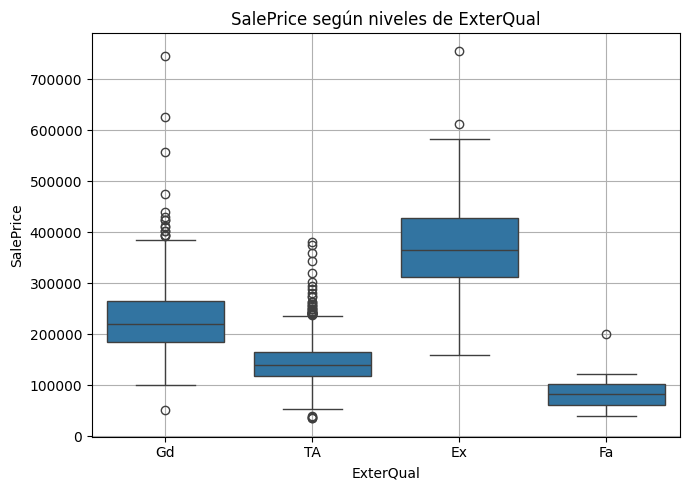

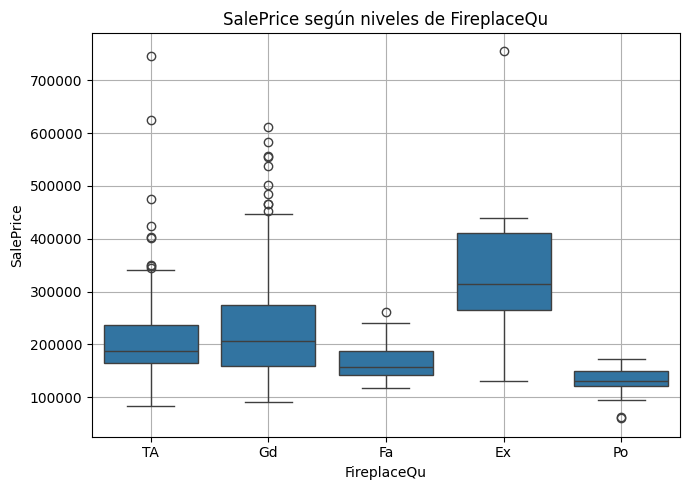

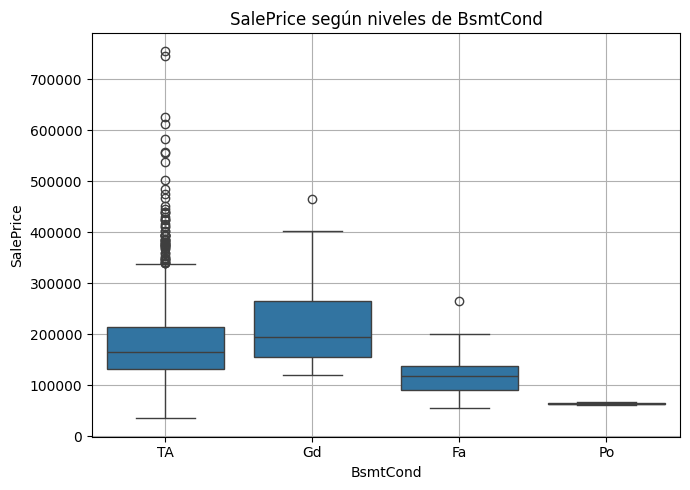

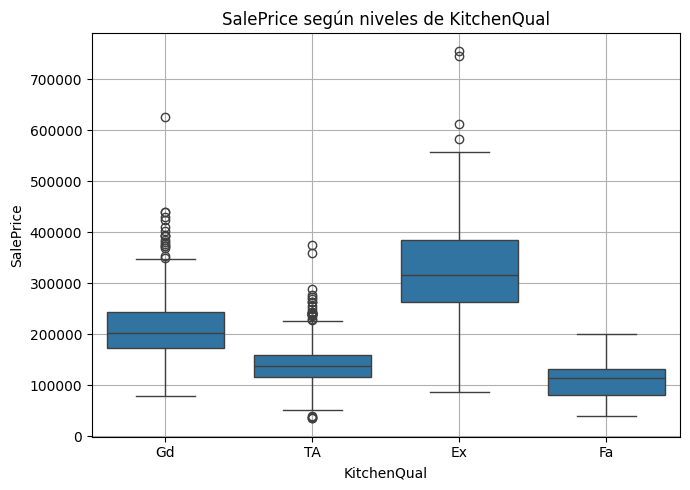

In [ ]:
# Relaci√≥n de SalePrice con variables ordinales o categ√≥ricas

variables_ordinales = ['ExterQual', 'FireplaceQu', 'BsmtCond', 'KitchenQual']

for col in variables_ordinales:
    if col in casas_final.columns:
        plt.figure(figsize=(7, 5))
        sns.boxplot(data=casas_final, x=col, y='SalePrice')
        plt.title(f'SalePrice seg√∫n niveles de {col}')
        plt.xlabel(col)
        plt.ylabel('SalePrice')
        plt.grid(True)
        plt.tight_layout()
        plt.show()


## Columna 12 ‚Äì **FireplaceQu**

La variable FireplaceQu representa la calidad de la chimenea de la vivienda, en caso de tenerla. Al ser una variable ordinal, los niveles representan un orden jer√°rquico de calidad.

Estos son los valores que puede tomar:


*   **Ex** ‚Äî Excelente calidad

*   **Gd** ‚Äî Buena calidad
*   **TA** ‚Äî Calidad promedio
*   **Fa** ‚Äî Calidad regular o deficiente
*   **Po** ‚Äî Mala calidad


*   **None** ‚Äî Sin chimenea (valor faltante imputado)






Podemos visualizar los primeros valores con:

In [ ]:
casas_final['FireplaceQu'] = casas_final['FireplaceQu'].fillna('None')

In [ ]:
casas_final["FireplaceQu"].head()


0    None
1      TA
2      TA
3      Gd
4      TA
Name: FireplaceQu, dtype: object

Y ver la frecuencia con:

In [ ]:
casas_final["FireplaceQu"].value_counts(dropna=False)


FireplaceQu
None    690
Gd      380
TA      313
Fa       33
Ex       24
Po       20
Name: count, dtype: int64

Podemos hacer un boxplot de estas categorias:

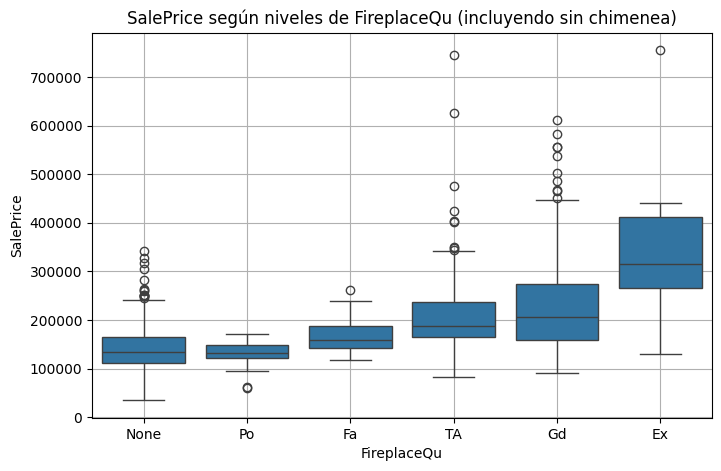

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=casas_final, x='FireplaceQu', y='SalePrice',
            order=['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'])
plt.title('SalePrice seg√∫n niveles de FireplaceQu (incluyendo sin chimenea)')
plt.xlabel('FireplaceQu')
plt.ylabel('SalePrice')
plt.grid(True)
plt.show()




Vease que las viviendas sin chimenea (None) presentan precios m√°s bajos y concentrados, lo que sugiere que la mera presencia de una chimenea ya representa un valor agregado para la propiedad. Conforme mejora la calidad de la chimenea, el precio de venta tiende a incrementarse, lo cual confirma la relaci√≥n ordinal l√≥gica de esta variable. Adem√°s, las casas con chimeneas de calidad Gd y Ex no solo exhiben precios m√°s altos, sino tambi√©n una mayor dispersi√≥n, lo que indica que estas chimeneas suelen encontrarse en viviendas de gama media-alta o premium. Finalmente, la diferencia observada entre las categor√≠as None, Po y Fa es significativa, mostrando que incluso una chimenea de baja calidad puede ser mejor valorada por los compradores que no tener ninguna.









### Conclusiones sobre la variable **FireplaceQu**


*   FireplaceQu es una variable categ√≥rica ordinal que representa la calidad de la chimenea, y se relaciona directamente con el precio de venta de las viviendas.

*   La inclusi√≥n de la categor√≠a "None" permite representar correctamente a las viviendas que no tienen chimenea, las cuales constituyen casi la mitad del conjunto de datos.

*   El an√°lisis mediante boxplot revela una relaci√≥n positiva clara: conforme mejora la calidad de la chimenea (Po ‚Üí Fa ‚Üí TA ‚Üí Gd ‚Üí Ex), tambi√©n aumenta el SalePrice.

*   Las viviendas sin chimenea (None) tienden a tener los precios m√°s bajos, confirmando que la presencia de una chimenea, incluso de baja calidad, representa un valor agregado.
*   Las categor√≠as superiores (Gd y Ex) no solo concentran precios m√°s altos, sino tambi√©n una mayor dispersi√≥n, lo cual sugiere que se encuentran en propiedades de mayor valor y m√°s variabilidad.

## Columna 13 ‚Äì **Electrical**

La variable Electrical indica el tipo de sistema el√©ctrico que tiene instalada la vivienda. Es una variable nominal, ya que no existe un orden entre las categor√≠as.

Estos son los valores que puede tomar:

*   **SBrkr** ‚Äî Breakers est√°ndar (m√°s com√∫n)

*   **FuseA** ‚Äî Fuses de 60A

*   **FuseF** ‚Äî Fuses de 60A sin tierra
*   **FuseP** ‚Äî Fuses de 60A (posiblemente defectuoso o parcial)



*   **Mix** ‚Äî Mezcla de distintos sistemas





Podemos visualizar los primeros valores con:

In [ ]:
casas_final["Electrical"].head()


0    SBrkr
1    SBrkr
2    SBrkr
3    SBrkr
4    SBrkr
Name: Electrical, dtype: object

Y ver la frecuencia de cada categor√≠a:

In [ ]:
casas_final["Electrical"].value_counts(dropna=False)


Electrical
SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

Podemos hacer un boxplot de estas categorias:

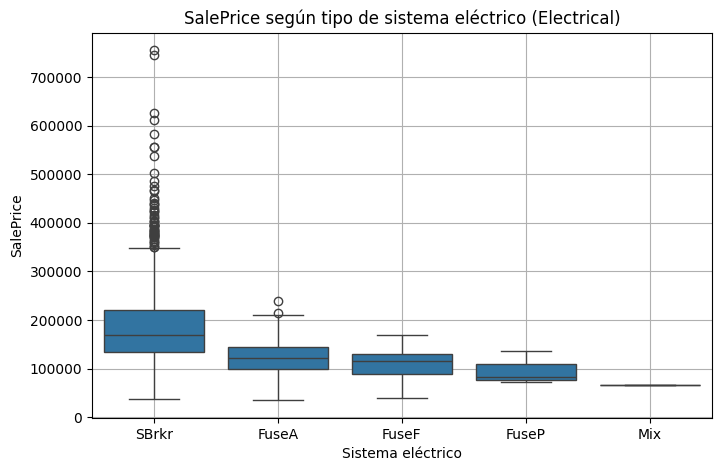

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=casas_final, x='Electrical', y='SalePrice',
            order=casas_final['Electrical'].value_counts().index)
plt.title('SalePrice seg√∫n tipo de sistema el√©ctrico (Electrical)')
plt.xlabel('Sistema el√©ctrico')
plt.ylabel('SalePrice')
plt.grid(True)
plt.show()


El gr√°fico de cajas muestra c√≥mo var√≠a el precio de venta (SalePrice) en funci√≥n del tipo de sistema el√©ctrico (Electrical). Se observa que el sistema SBrkr es el m√°s com√∫n y est√° asociado con los precios de venta m√°s altos y una mayor dispersi√≥n, lo que indica que aparece tanto en casas de gama media como en propiedades de mayor valor. En cambio, los sistemas basados en fusibles (FuseA, FuseF, FuseP) y la categor√≠a Mix est√°n presentes en muy pocas viviendas y se asocian con precios m√°s bajos y menor variabilidad, lo cual puede reflejar construcciones m√°s antiguas o instalaciones menos modernas. La clara diferencia entre SBrkr y los dem√°s tipos sugiere que el tipo de instalaci√≥n el√©ctrica puede influir en la percepci√≥n de valor de la vivienda, siendo SBrkr un indicador de mayor confiabilidad y modernidad.

### Conclusiones sobre la variable **Electrical**

*   La variable Electrical es categ√≥rica nominal, ya que sus valores representan tipos de sistemas el√©ctricos sin un orden jer√°rquico.

*   El valor SBrkr (sistema de interruptores) domina en frecuencia, estando presente en m√°s del 90% de las viviendas.

*   Las casas con sistema SBrkr tienden a tener precios de venta m√°s altos y una mayor dispersi√≥n, lo que sugiere que este sistema es m√°s moderno y confiable.

*   Las categor√≠as FuseA, FuseF, FuseP y Mix est√°n presentes en muy pocas viviendas y se asocian con precios de venta m√°s bajos y menos variables, lo cual podr√≠a estar relacionado con instalaciones antiguas o menos seguras.
*  
La variable Electrical podr√≠a estar correlacionada con la antig√ºedad de la construcci√≥n y es √∫til para complementar otras variables como YearBuilt o OverallQual.



## Columna 14 ‚Äì **LotFrontage**

Esta columna representa la longitud del frente del lote de la propiedad, es decir, la cantidad de pies lineales que tiene el terreno en contacto con la calle (en pies).

Al ser una variable continua, puede tomar una amplia gama de valores. Seg√∫n la descripci√≥n estad√≠stica obtenida, los valores t√≠picos se encuentran entre 60 y 80 pies, aunque hay propiedades con frentes tan amplios como m√°s de 300 pies, lo cual genera algunos valores at√≠picos.



In [ ]:
casas_final["LotFrontage"].head()


0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64

Vemos que es una variable continua, asi que podemos optener un resumen estadistico de la variable si usamos el metodo .describe()

In [ ]:
casas_final['LotFrontage'].describe()


count    1460.000000
mean       70.626547
std        22.968865
min        21.000000
25%        60.000000
50%        70.000000
75%        80.531366
max       313.000000
Name: LotFrontage, dtype: float64

Podemos hacer un histograma para poder visualizar estas descripciones.

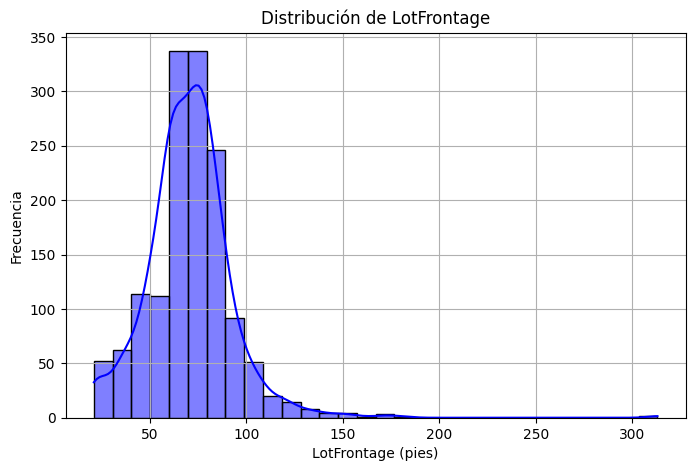

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(casas_final['LotFrontage'], bins=30, kde=True, color='blue')
plt.title('Distribuci√≥n de LotFrontage')
plt.xlabel('LotFrontage (pies)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()



La distribuci√≥n de LotFrontage presenta una forma asim√©trica hacia la derecha. La mayor√≠a de los datos se concentran entre 50 y 100 pies de frente. La curva KDE en azul oscuro permite visualizar mejor el sesgo positivo y la presencia de lotes con frentes inusualmente largos (hasta m√°s de 300 pies).



Podemos hacer un boxplot para ver de una manera mejor los valores atipicos de la variable LotFrontage.

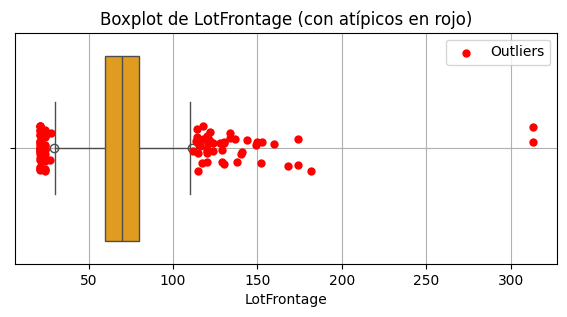

In [ ]:
import numpy as np

# Calcular valores at√≠picos
Q1 = casas_final['LotFrontage'].quantile(0.25)
Q3 = casas_final['LotFrontage'].quantile(0.75)
IQR = Q3 - Q1
limite_sup = Q3 + 1.5 * IQR
limite_inf = Q1 - 1.5 * IQR

# Separar at√≠picos
outliers = casas_final[(casas_final['LotFrontage'] > limite_sup) | (casas_final['LotFrontage'] < limite_inf)]['LotFrontage']
normales = casas_final[(casas_final['LotFrontage'] <= limite_sup) & (casas_final['LotFrontage'] >= limite_inf)]['LotFrontage']

# Graficar boxplot personalizado
plt.figure(figsize=(7, 3))
sns.boxplot(x=normales, color='orange')
sns.stripplot(x=outliers, color='red', size=6, jitter=True, label='Outliers')
plt.title('Boxplot de LotFrontage (con at√≠picos en rojo)')
plt.xlabel('LotFrontage')
plt.grid(True)
plt.legend()
plt.show()



El boxplot de la variable LotFrontage muestra una concentraci√≥n de valores entre aproximadamente 60 y 100 pies, lo cual se alinea con el rango intercuart√≠lico (IQR) observado previamente.

Los valores at√≠picos (outliers) est√°n marcados en rojo y se encuentran principalmente en dos extremos:

En el extremo izquierdo: algunos valores por debajo del m√≠nimo t√≠pico (menores a 30 pies).

En el extremo derecho: propiedades con frentes de lote muy amplios, incluso mayores a 150 o hasta m√°s de 300 pies.

Estos outliers pueden ser propiedades inusuales (como mansiones o terrenos irregulares) y es importante analizarlos por separado si se desea evitar que distorsionen modelos estad√≠sticos. La cantidad de valores at√≠picos a la derecha sugiere una asimetr√≠a positiva en la variable.


Veamos que tan correlacionadas estan las variables LongFrontage y SalePrice

In [ ]:
casas_final[['LotFrontage', 'SalePrice']].corr()



LotFrontage  SalePrice
LotFrontage     1.000000   0.356091
SalePrice       0.356091   1.000000

La correlaci√≥n de Pearson calculada entre estas dos variables es de 0.356, lo que indica una correlaci√≥n positiva moderada. Es decir, aunque existe una relaci√≥n directa entre ambas variables, esta no es suficientemente fuerte como para predecir el precio de venta √∫nicamente con LotFrontage, pero s√≠ sugiere que puede ser √∫til como variable complementaria dentro de un modelo multivariable.

Realizemos la grafica de dispercion de la variable LotFrontage vs SalePrice

<Axes: xlabel='LotFrontage', ylabel='SalePrice'>

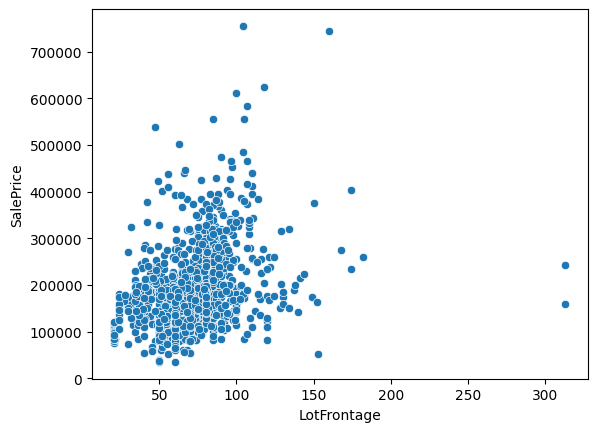

In [ ]:
sns.scatterplot(x='LotFrontage', y='SalePrice', data=casas_final)


La gr√°fica de dispersi√≥n muestra la relaci√≥n entre la longitud del frente del lote (LotFrontage) y el precio de venta de la vivienda (SalePrice). Visualmente, se aprecia una tendencia ascendente general: a mayor frente de lote, el precio de venta tiende a ser m√°s alto.

Sin embargo, esta relaci√≥n no es perfectamente lineal, ya que hay bastante dispersi√≥n en los puntos, especialmente entre 50 y 100 pies.

### Conclusiones sobre la variable **LotFrontage**
LotFrontage es una variable cuantitativa continua que representa el tama√±o del

*   LotFrontage es una variable cuantitativa continua que representa el tama√±o del frente del lote en pies
*   La distribuci√≥n de sus valores es asim√©trica hacia la derecha, con la mayor√≠a de los casos concentrados entre 60 y 80 pies
*   Existen varios valores at√≠picos, principalmente hacia la derecha (mayores a 150 pies), lo cual puede deberse a terrenos at√≠picos o propiedades especiales como mansiones o esquinas
*   El boxplot confirm√≥ estos outliers, los cuales deben tratarse con cuidado si se utilizan modelos sensibles a valores extremos.
*   La correlaci√≥n de Pearson con SalePrice fue de 0.356, lo cual indica una relaci√≥n positiva moderada: en general, a mayor frente de lote, mayor tiende a ser el precio, pero con bastante dispersi√≥n.
*   La gr√°fica de dispersi√≥n tambi√©n reflej√≥ esta relaci√≥n, mostrando que aunque existe una tendencia creciente, no es lo suficientemente fuerte como para ser usada como predictor √∫nico, pero s√≠ √∫til como variable de apoyo en modelos multivariados.


## Columna 15 ‚Äì **KitchenQual**

La variable KitchenQual representa la calidad de la cocina de la vivienda. Al ser una variable ordinal, sus valores tienen un orden jer√°rquico de calidad.

Estos son los valores que puede tomar:
*   **Ex** ‚Äî Excelente calidad

*   **Fa** ‚Äî Calidad regular o deficiente
*   **Gd** ‚Äî Buena calidad
*   **TA** ‚Äî Calidad promedio

Podemos visualizar los primeros valores con:



In [ ]:
casas_final["KitchenQual"].head()


0    Gd
1    TA
2    Gd
3    Gd
4    Gd
Name: KitchenQual, dtype: object

Y ver la frecuencia con:

In [ ]:
casas_final["KitchenQual"].value_counts(dropna=False)


KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: count, dtype: int64

Podemos hacer un boxplot de estas categor√≠as:

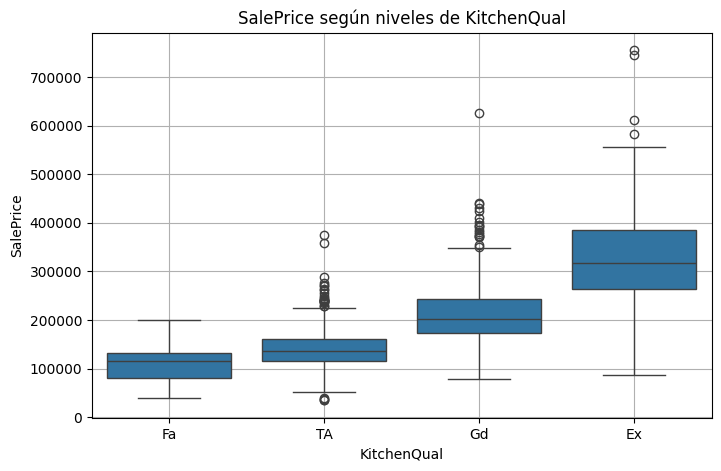

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=casas_final, x='KitchenQual', y='SalePrice',
            order=['Fa', 'TA', 'Gd', 'Ex'])
plt.title('SalePrice seg√∫n niveles de KitchenQual')
plt.xlabel('KitchenQual')
plt.ylabel('SalePrice')
plt.grid(True)
plt.show()


Se observa que las viviendas con cocinas calificadas como Fa presentan los precios de venta m√°s bajos, con poca variabilidad. Conforme aumenta la calidad de la cocina, tambi√©n se incrementa el valor de la vivienda de forma clara y progresiva. Las cocinas con calidad TA  son las m√°s frecuentes, seguidas por Gd. Finalmente, las casas con cocinas Ex  concentran los precios de venta m√°s altos y la mayor dispersi√≥n, lo que sugiere que esta categor√≠a est√° presente principalmente en viviendas de gama alta. Esta progresi√≥n ordenada confirma que KitchenQual es una variable altamente relevante para explicar el comportamiento del precio de venta.

### Conclusiones sobre la variable **KitchenQual**

*   KitchenQual es una variable categ√≥rica ordinal que representa la calidad percibida de la cocina de la vivienda.

*   Las cocinas con calificaci√≥n baja (Fa) est√°n asociadas a precios m√°s bajos y menor variabilidad.

*  Las cocinas Gd y Ex se asocian con precios significativamente m√°s altos y mayor dispersi√≥n, lo cual indica que est√°n presentes en viviendas de mayor valor.

*   La relaci√≥n entre KitchenQual y SalePrice es creciente y l√≥gica, lo que confirma su utilidad como predictor en modelos de regresi√≥n o clasificaci√≥n.


















## Columna 16 ‚Äì **PavedDrive**

La variable PavedDrive indica si la entrada al garaje de la vivienda est√° pavimentada o no. Es una variable categ√≥rica nominal, ya que sus valores representan opciones distintas sin un orden jer√°rquico.

Estos son los valores que puede tomar:


*   **Y** ‚Äî Yes, la entrada est√° completamente pavimentada

*   **P** ‚Äî Partial, la entrada est√° pavimentada parcialmente
*  **N** ‚Äî No, la entrada no est√° pavimentada








Podemos visualizar los primeros valores con:

In [ ]:
casas_final["PavedDrive"].head()


0    Y
1    Y
2    Y
3    Y
4    Y
Name: PavedDrive, dtype: object

Y ver la frecuencia con:

In [ ]:
casas_final["PavedDrive"].value_counts(dropna=False)


PavedDrive
Y    1340
N      90
P      30
Name: count, dtype: int64

Podemos hacer un boxplot para comparar c√≥mo se relaciona esta variable con el precio de venta:

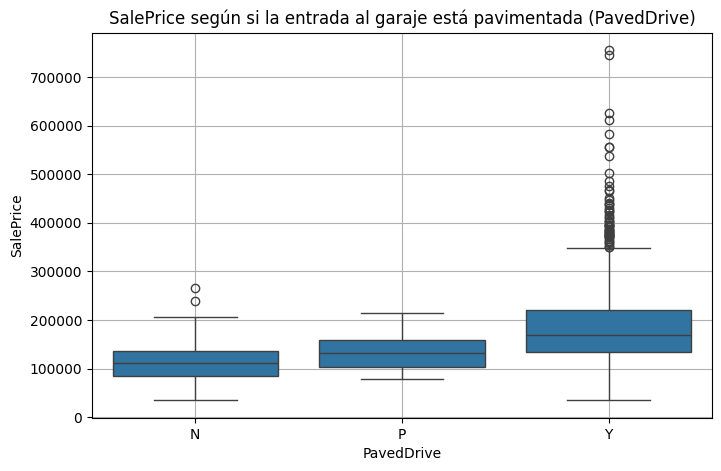

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=casas_final, x='PavedDrive', y='SalePrice',
            order=['N', 'P', 'Y'])
plt.title('SalePrice seg√∫n si la entrada al garaje est√° pavimentada (PavedDrive)')
plt.xlabel('PavedDrive')
plt.ylabel('SalePrice')
plt.grid(True)
plt.show()


El boxplot revela que las viviendas con entrada no pavimentada (N) presentan los precios de venta m√°s bajos y concentrados, lo que puede asociarse con viviendas m√°s antiguas, ubicaciones rurales o menor nivel de mantenimiento. Las entradas pavimentadas parcialmente (P) muestran un ligero aumento en el precio medio, mientras que las viviendas con entradas completamente pavimentadas (Y) concentran la mayor√≠a de los casos (1340 de 1460) y exhiben una mayor mediana de SalePrice y mayor dispersi√≥n. Este patr√≥n indica que una entrada pavimentada no solo mejora la funcionalidad, sino tambi√©n la percepci√≥n del valor del inmueble.

### Conclusiones sobre la variable **PavedDrive**

*   PavedDrive es una variable categ√≥rica nominal que refleja la condici√≥n del acceso al garaje de la vivienda..

*   Las viviendas con entrada no pavimentada (N) se asocian con los precios de venta m√°s bajos, lo cual puede reflejar menor urbanizaci√≥n o mantenimiento.

*  Las entradas parcialmente pavimentadas (P) presentan una ligera mejora respecto a N, aunque su frecuencia es baja.

*   Las entradas completamente pavimentadas (Y) son las m√°s comunes y est√°n relacionadas con los precios m√°s altos y una mayor variabilidad, lo cual sugiere una asociaci√≥n con viviendas de mayor valor o m√°s recientes.

* Esta variable puede mejorar el rendimiento de modelos predictivos al capturar una caracter√≠stica visual y funcional que impacta la percepci√≥n del comprador.
